# Modeling Tutorial: From One-Dimensional Growth to Predator–Prey Systems
**Robert J. Flassig using Claude.ai**
**October 20, 2025**

---

## Learning Goals
By the end of this tutorial you will be able to:
- Translate verbal assumptions into quantitative models
- Simulate and visualize the dynamics of nonlinear systems
- Interpret the meaning of model parameters in a physical or ecological context
- Explore how parameter changes affect qualitative system behavior
- Optionally: perform stability and phase-space analysis

In [1]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

---
# Part 1: The Logistic Growth Model (1D)

## Model Construction

**Verbal Assumptions:**
- A1: The population grows at a rate proportional to its current size
- A2: Growth slows down as the population approaches a maximum capacity K

**Mathematical Model:**
$$\frac{dx}{dt} = r x\left(1 - \frac{x}{K}\right)$$

where:
- $r$: intrinsic growth rate [1/time]
- $K$: carrying capacity
- $x$: population size

**Interpretation:** At small $x$, the term $(1 - x/K) \approx 1$, and we recover exponential growth. As $x \to K$, the growth term approaches zero—resources limit further increase.

## Basic Implementation

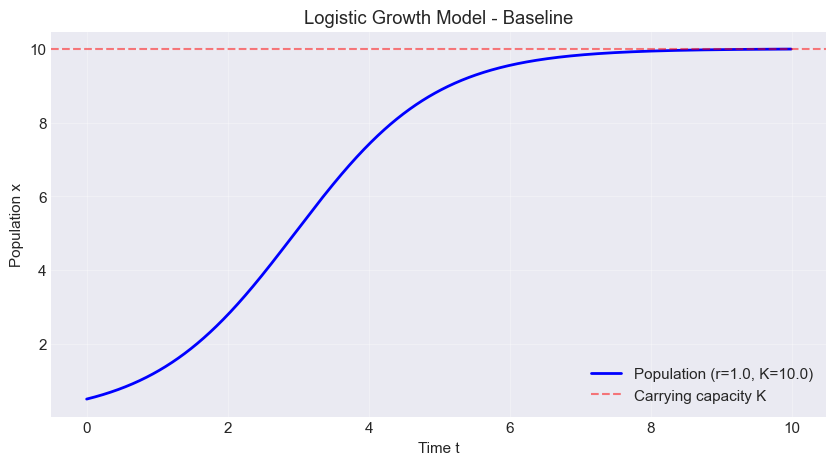

In [2]:
def logistic_growth_euler(r, K, x0, dt, T):
    """
    Simulate logistic growth using Euler method.
    
    Parameters:
    -----------
    r : float
        Growth rate [1/time]
    K : float
        Carrying capacity
    x0 : float
        Initial population
    dt : float
        Time step
    T : float
        Total simulation time
    
    Returns:
    --------
    t : array
        Time vector
    x : array
        Population at each time step
    """
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    x[0] = x0
    
    for i in range(1, len(t)):
        dxdt = r * x[i-1] * (1 - x[i-1]/K)
        x[i] = x[i-1] + dt * dxdt
    
    return t, x

# Baseline simulation
r = 1.0
K = 10.0
x0 = 0.5
dt = 0.01
T = 10.0

t, x = logistic_growth_euler(r, K, x0, dt, T)

plt.figure(figsize=(10, 5))
plt.plot(t, x, 'b-', linewidth=2, label=f'Population (r={r}, K={K})')
plt.axhline(y=K, color='r', linestyle='--', alpha=0.5, label='Carrying capacity K')
plt.xlabel('Time t')
plt.ylabel('Population x')
plt.title('Logistic Growth Model - Baseline')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
## Task T1: Interpret the parameters r and K

**Answer:**

**Parameter r (intrinsic growth rate):**
- **Biological meaning:** Represents the natural birth rate minus death rate of the population
- **Effect:** Controls how quickly the population grows when resources are abundant
- **Physical interpretation:** Higher r means faster reproduction or lower natural mortality
- **Units:** [1/time], e.g., per day, per year

**Parameter K (carrying capacity):**
- **Biological meaning:** Maximum population size that the environment can sustain indefinitely
- **Effect:** Sets the equilibrium population level
- **Physical interpretation:** Determined by available resources (food, space, nutrients)
- **Units:** Same as population x (number of individuals, biomass, concentration)

**Key insight:** r affects *how fast* equilibrium is reached, while K determines *what* that equilibrium is.

---
## Task T2: Effect of varying r values

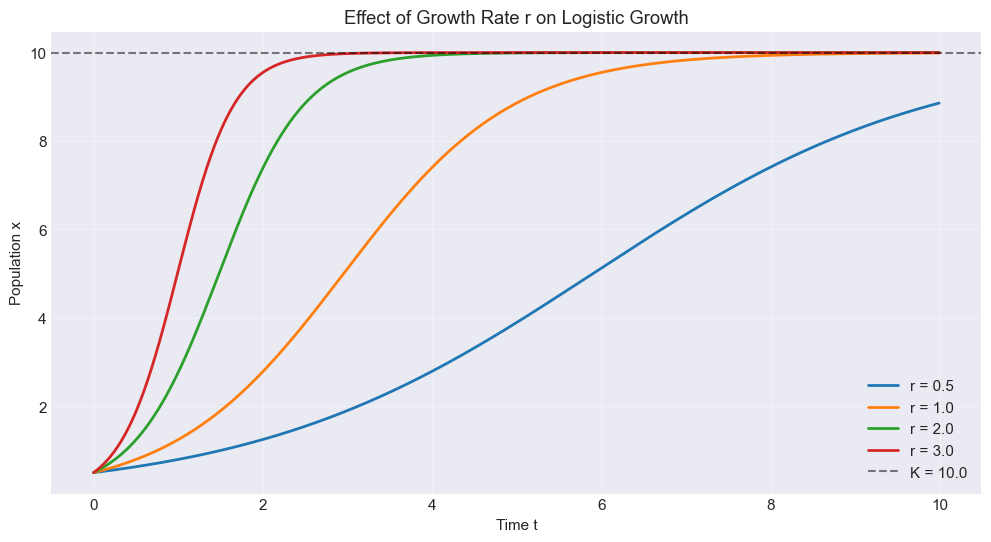


=== INTERPRETATION (Task T2) ===
Observation: As r increases, the population reaches carrying capacity K faster.

Biological meaning:
  - Low r (0.5): Slow-reproducing species (e.g., elephants, whales)
  - High r (3.0): Fast-reproducing species (e.g., bacteria, insects)

Mathematical note: The approach to equilibrium is approximately exponential
with rate constant related to r. For small deviations from K, linearization
shows that perturbations decay at rate ≈ r.


In [3]:
# Test different r values
r_values = [0.5, 1.0, 2.0, 3.0]
K = 10.0
x0 = 0.5
dt = 0.01
T = 10.0

plt.figure(figsize=(12, 6))

for r in r_values:
    t, x = logistic_growth_euler(r, K, x0, dt, T)
    plt.plot(t, x, linewidth=2, label=f'r = {r}')

plt.axhline(y=K, color='black', linestyle='--', alpha=0.5, label=f'K = {K}')
plt.xlabel('Time t')
plt.ylabel('Population x')
plt.title('Effect of Growth Rate r on Logistic Growth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== INTERPRETATION (Task T2) ===")
print("Observation: As r increases, the population reaches carrying capacity K faster.")
print("")
print("Biological meaning:")
print("  - Low r (0.5): Slow-reproducing species (e.g., elephants, whales)")
print("  - High r (3.0): Fast-reproducing species (e.g., bacteria, insects)")
print("")
print("Mathematical note: The approach to equilibrium is approximately exponential")
print("with rate constant related to r. For small deviations from K, linearization")
print("shows that perturbations decay at rate ≈ r.")

---
## Task T3: Initial condition x0 > K

/Users/robert/WORK/THB/Vorlesungen/WS2025/CSM/complex-systems-modeling/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


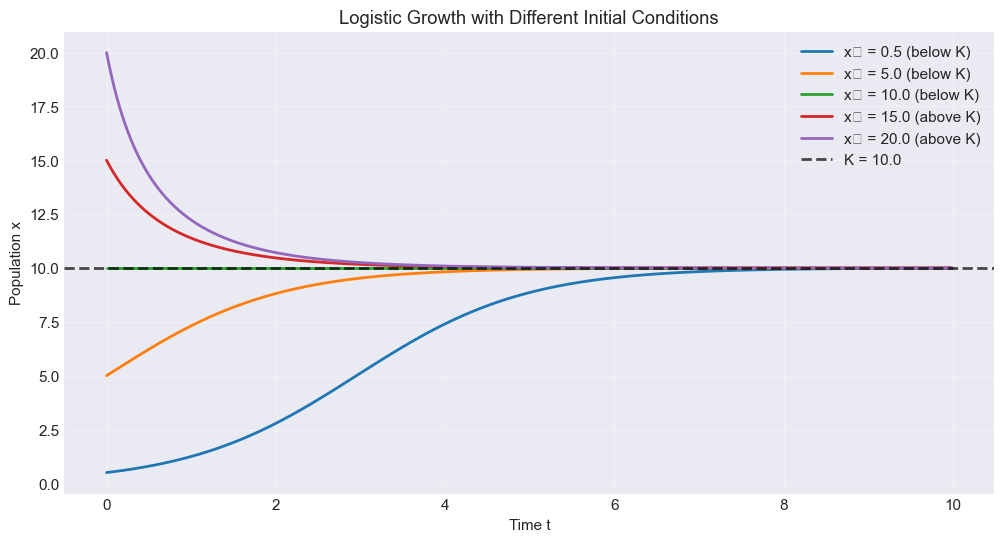


=== INTERPRETATION (Task T3) ===
When x₀ > K (initial population exceeds carrying capacity):

Mathematical behavior:
  - The term (1 - x/K) becomes NEGATIVE
  - Therefore dx/dt < 0, causing population to DECREASE
  - Population declines monotonically toward K

Biological interpretation:
  - Overshoot scenario: Population exceeds sustainable level
  - Causes: Migration, temporary resource abundance, reduced predation
  - Consequences: Resource depletion, increased competition, starvation
  - Result: Population 'crashes' back to carrying capacity

Real-world examples:
  - Deer populations after predator removal
  - Bacterial cultures with initial nutrient spike
  - Invasive species temporary boom-bust cycles

Key insight: K acts as a stable equilibrium regardless of initial condition!


In [4]:
# Simulate with x0 > K
r = 1.0
K = 10.0
x0_values = [0.5, 5.0, 10.0, 15.0, 20.0]  # Including values above K
dt = 0.01
T = 10.0

plt.figure(figsize=(12, 6))

for x0 in x0_values:
    t, x = logistic_growth_euler(r, K, x0, dt, T)
    label = f'x₀ = {x0}' + (' (above K)' if x0 > K else ' (below K)')
    plt.plot(t, x, linewidth=2, label=label)

plt.axhline(y=K, color='black', linestyle='--', linewidth=2, alpha=0.7, label=f'K = {K}')
plt.xlabel('Time t')
plt.ylabel('Population x')
plt.title('Logistic Growth with Different Initial Conditions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== INTERPRETATION (Task T3) ===")
print("When x₀ > K (initial population exceeds carrying capacity):")
print("")
print("Mathematical behavior:")
print("  - The term (1 - x/K) becomes NEGATIVE")
print("  - Therefore dx/dt < 0, causing population to DECREASE")
print("  - Population declines monotonically toward K")
print("")
print("Biological interpretation:")
print("  - Overshoot scenario: Population exceeds sustainable level")
print("  - Causes: Migration, temporary resource abundance, reduced predation")
print("  - Consequences: Resource depletion, increased competition, starvation")
print("  - Result: Population 'crashes' back to carrying capacity")
print("")
print("Real-world examples:")
print("  - Deer populations after predator removal")
print("  - Bacterial cultures with initial nutrient spike")
print("  - Invasive species temporary boom-bust cycles")
print("")
print("Key insight: K acts as a stable equilibrium regardless of initial condition!")

---
## Task T4: Parameter grid comparison

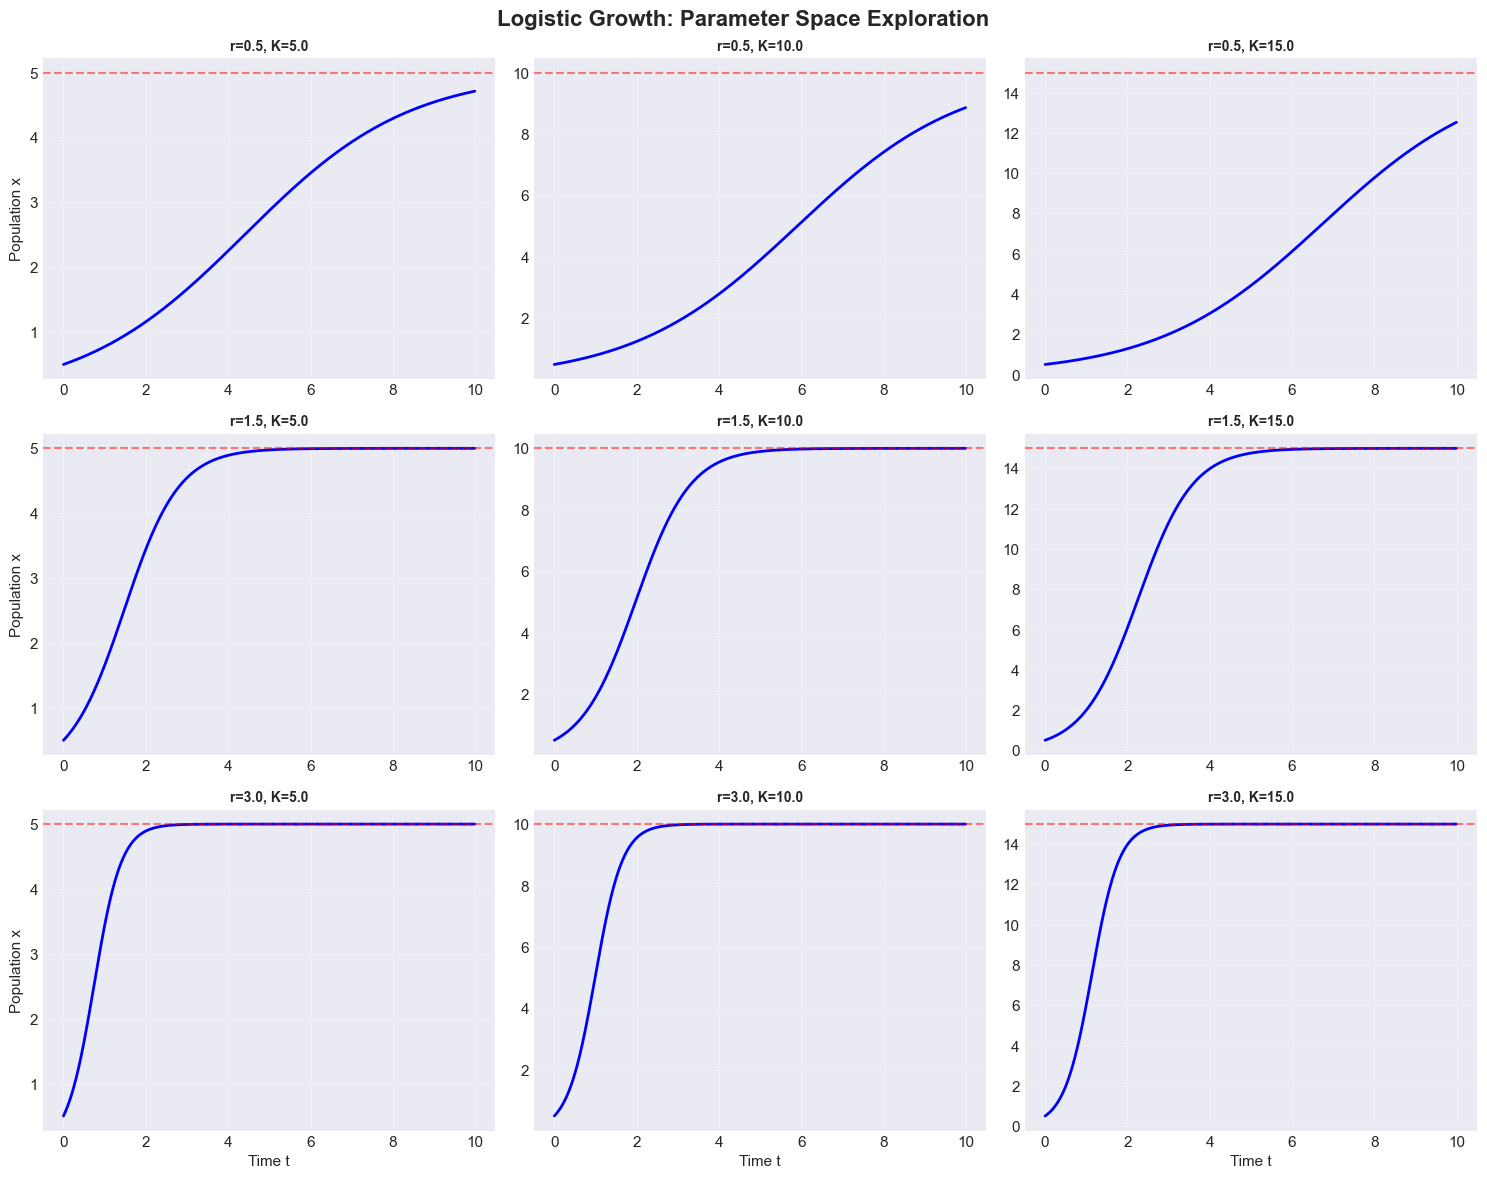


=== INTERPRETATION (Task T4) ===

Horizontal patterns (varying K, fixed r):
  - All curves have the same 'shape' (approach rate)
  - Only the final equilibrium level changes
  - Time to reach 95% of K is approximately constant

Vertical patterns (varying r, fixed K):
  - All reach the same equilibrium K
  - Higher r → steeper curves, faster equilibration
  - Lower r → gentler curves, slower equilibration

Diagonal patterns:
  - High r, high K: Fast growth to large population
  - Low r, low K: Slow growth to small population

Practical implications:
  - Conservation: Low K species more vulnerable to extinction
  - Fisheries: Need to know both r and K for sustainable harvest
  - Biotechnology: High r, high K desired for production


In [5]:
# Create a grid of subplots for different r and K combinations
r_values = [0.5, 1.5, 3.0]
K_values = [5.0, 10.0, 15.0]
x0 = 0.5
dt = 0.01
T = 10.0

fig, axes = plt.subplots(len(r_values), len(K_values), figsize=(15, 12))
fig.suptitle('Logistic Growth: Parameter Space Exploration', fontsize=16, fontweight='bold')

for i, r in enumerate(r_values):
    for j, K in enumerate(K_values):
        ax = axes[i, j]
        t, x = logistic_growth_euler(r, K, x0, dt, T)
        
        ax.plot(t, x, 'b-', linewidth=2)
        ax.axhline(y=K, color='r', linestyle='--', alpha=0.5, linewidth=1.5)
        ax.set_title(f'r={r}, K={K}', fontsize=10, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        if i == len(r_values) - 1:
            ax.set_xlabel('Time t')
        if j == 0:
            ax.set_ylabel('Population x')

plt.tight_layout()
plt.show()

print("\n=== INTERPRETATION (Task T4) ===")
print("\nHorizontal patterns (varying K, fixed r):")
print("  - All curves have the same 'shape' (approach rate)")
print("  - Only the final equilibrium level changes")
print("  - Time to reach 95% of K is approximately constant")
print("")
print("Vertical patterns (varying r, fixed K):")
print("  - All reach the same equilibrium K")
print("  - Higher r → steeper curves, faster equilibration")
print("  - Lower r → gentler curves, slower equilibration")
print("")
print("Diagonal patterns:")
print("  - High r, high K: Fast growth to large population")
print("  - Low r, low K: Slow growth to small population")
print("")
print("Practical implications:")
print("  - Conservation: Low K species more vulnerable to extinction")
print("  - Fisheries: Need to know both r and K for sustainable harvest")
print("  - Biotechnology: High r, high K desired for production")

---
## Task T5 (Optional): Analytical equilibrium and stability

### Finding Equilibrium Points

At equilibrium: $\frac{dx}{dt} = 0$

$$r x\left(1 - \frac{x}{K}\right) = 0$$

This gives us two equilibrium points:
1. $x^* = 0$ (extinction)
2. $x^* = K$ (carrying capacity)

### Stability Analysis

To determine stability, we compute the derivative of $f(x) = rx(1 - x/K)$:

$$f'(x) = r\left(1 - \frac{2x}{K}\right)$$

**At $x^* = 0$:**
- $f'(0) = r > 0$
- **Conclusion:** Unstable equilibrium (population grows away from zero)

**At $x^* = K$:**
- $f'(K) = r(1 - 2) = -r < 0$
- **Conclusion:** Stable equilibrium (population returns to K after perturbations)

### Visualization of Stability

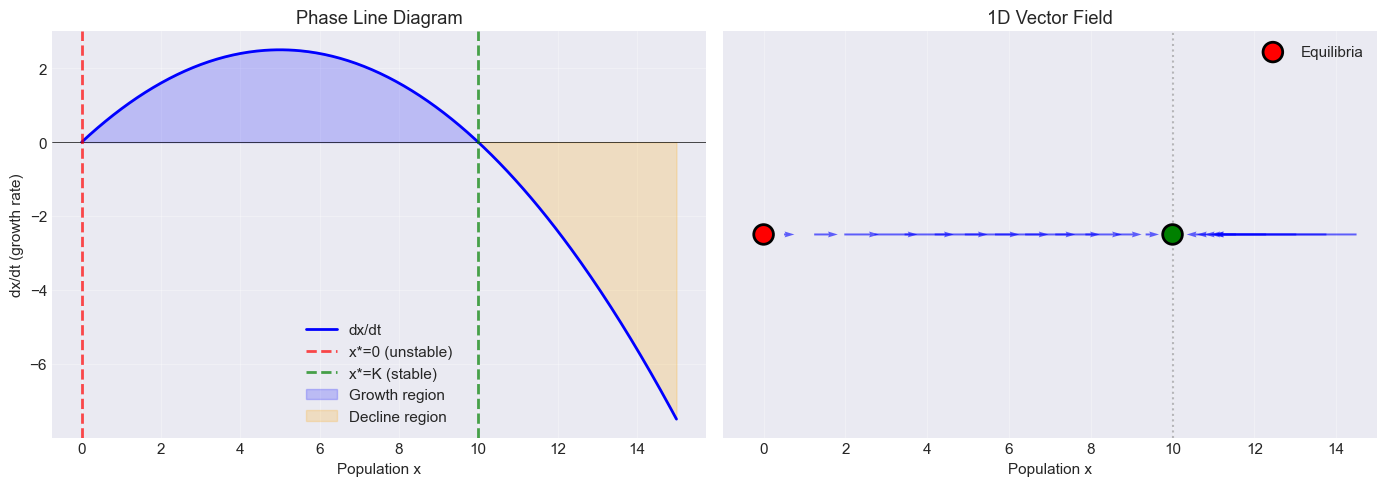


=== ANALYTICAL RESULTS (Task T5) ===

Equilibrium points:
  x* = 0   [UNSTABLE - populations grow away from extinction]
  x* = 10.0  [STABLE - populations converge to carrying capacity]

Stability analysis:
  At x*=0:  f'(0) = 1.0 > 0   → Unstable
  At x*=K:  f'(K) = -1.0 < 0  → Stable

Biological interpretation:
  - Extinction (x=0) is unstable: any small population will grow
  - Carrying capacity (x=K) is stable: system returns after disturbances
  - All trajectories with x₀ > 0 converge to K
  - Convergence rate is approximately exponential with time constant τ ≈ 1/r


In [6]:
# Analytical stability visualization
r = 1.0
K = 10.0

# Create phase line diagram
x_range = np.linspace(0, 15, 300)
dxdt = r * x_range * (1 - x_range/K)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Phase line (dx/dt vs x)
axes[0].plot(x_range, dxdt, 'b-', linewidth=2, label='dx/dt')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='x*=0 (unstable)')
axes[0].axvline(x=K, color='green', linestyle='--', linewidth=2, alpha=0.7, label='x*=K (stable)')
axes[0].fill_between(x_range, 0, dxdt, where=(dxdt > 0), alpha=0.2, color='blue', label='Growth region')
axes[0].fill_between(x_range, 0, dxdt, where=(dxdt < 0), alpha=0.2, color='orange', label='Decline region')
axes[0].set_xlabel('Population x')
axes[0].set_ylabel('dx/dt (growth rate)')
axes[0].set_title('Phase Line Diagram')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Vector field on the line
x_arrows = np.linspace(0.5, 14.5, 20)
dxdt_arrows = r * x_arrows * (1 - x_arrows/K)
y_arrows = np.zeros_like(x_arrows)

axes[1].quiver(x_arrows, y_arrows, dxdt_arrows, np.zeros_like(dxdt_arrows), 
               scale=30, width=0.003, color='blue', alpha=0.6)
axes[1].scatter([0, K], [0, 0], s=200, c=['red', 'green'], 
               edgecolors='black', linewidths=2, zorder=5,
               label='Equilibria')
axes[1].axvline(x=K, color='gray', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Population x')
axes[1].set_ylim(-0.5, 0.5)
axes[1].set_xlim(-1, 15)
axes[1].set_title('1D Vector Field')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_yticks([])

plt.tight_layout()
plt.show()

print("\n=== ANALYTICAL RESULTS (Task T5) ===")
print(f"\nEquilibrium points:")
print(f"  x* = 0   [UNSTABLE - populations grow away from extinction]")
print(f"  x* = {K}  [STABLE - populations converge to carrying capacity]")
print(f"\nStability analysis:")
print(f"  At x*=0:  f'(0) = {r} > 0   → Unstable")
print(f"  At x*=K:  f'(K) = {-r} < 0  → Stable")
print(f"\nBiological interpretation:")
print(f"  - Extinction (x=0) is unstable: any small population will grow")
print(f"  - Carrying capacity (x=K) is stable: system returns after disturbances")
print(f"  - All trajectories with x₀ > 0 converge to K")
print(f"  - Convergence rate is approximately exponential with time constant τ ≈ 1/r")

---
# Part 2: The Predator–Prey System (2D)

## Model Equations

$$\frac{dx}{dt} = r x\left(1 - \frac{x}{K}\right) - \alpha xy$$

$$\frac{dy}{dt} = \beta xy - \delta y$$

where:
- $x$: prey population
- $y$: predator population
- $r$: prey reproduction rate
- $K$: prey carrying capacity
- $\alpha$: predation rate coefficient
- $\beta$: conversion efficiency (prey → predator biomass)
- $\delta$: predator death rate

---
## Task P1: Interpret each parameter

In [8]:
print("=" * 70)
print("TASK P1: PARAMETER INTERPRETATIONS")
print("=" * 70)

print("\n1. r (prey reproduction rate):")
print("   Biological: Birth rate of prey in absence of predators")
print("   Effect: Higher r → prey can sustain more predation")
print("   Equilibrium: Increases prey equilibrium (x*)")
print("   Units: [1/time]")

print("\n2. K (prey carrying capacity):")
print("   Biological: Maximum prey population without predators")
print("   Effect: Limits prey growth through intraspecific competition")
print("   Equilibrium: Increases both prey and predator equilibria")
print("   Oscillations: Higher K generally increases amplitude")

print("\n3. α (predation rate coefficient):")
print("   Biological: Hunting efficiency; encounters × success rate")
print("   Effect: Higher α → more prey killed per predator")
print("   Equilibrium: Decreases prey equilibrium, complex effect on predators")
print("   Oscillations: Strongly affects amplitude and period")

print("\n4. β (conversion efficiency):")
print("   Biological: Fraction of consumed prey converted to predator biomass")
print("   Effect: Higher β → predators reproduce more per prey eaten")
print("   Equilibrium: Increases predator equilibrium")
print("   Typical values: 0.1-0.5 (only 10-50% of energy is retained)")

print("\n5. δ (predator death rate):")
print("   Biological: Natural mortality of predators")
print("   Effect: Higher δ → predators need more prey to survive")
print("   Equilibrium: Decreases predator equilibrium")
print("   Oscillations: Affects frequency and amplitude")

print("\n" + "=" * 70)
print("WHICH PARAMETERS AFFECT WHAT?")
print("=" * 70)

print("\nPrey Equilibrium (x*) is primarily influenced by:")
print("   ↑ r → ↑ x*   (faster reproduction supports more predation)")
print("   ↑ α → ↓ x*   (higher predation pressure reduces prey)")
print("   ↑ δ → ↑ x*   (higher predator mortality reduces predation)")
print("   ↑ K → ↑ x*   (more resources support larger populations)")

print("\nPredator Equilibrium (y*) is primarily influenced by:")
print("   ↑ β → ↑ y*   (better conversion → more predators)")
print("   ↑ δ → ↓ y*   (higher mortality → fewer predators)")
print("   ↑ K → ↑ y*   (more prey resources → more predators)")

print("\nOscillation Amplitude is influenced by:")
print("   ↑ α → larger oscillations (stronger predator-prey coupling)")
print("   ↑ K → larger oscillations (more resources available)")
print("   The ratio β/δ affects predator efficiency")

print("\nOscillation Period is influenced by:")
print("   ↑ r → shorter period (faster prey response)")
print("   ↑ δ → shorter period (faster predator response)")
print("   The product αβ affects coupling strength")

TASK P1: PARAMETER INTERPRETATIONS

1. r (prey reproduction rate):
   Biological: Birth rate of prey in absence of predators
   Effect: Higher r → prey can sustain more predation
   Equilibrium: Increases prey equilibrium (x*)
   Units: [1/time]

2. K (prey carrying capacity):
   Biological: Maximum prey population without predators
   Effect: Limits prey growth through intraspecific competition
   Equilibrium: Increases both prey and predator equilibria
   Oscillations: Higher K generally increases amplitude

3. α (predation rate coefficient):
   Biological: Hunting efficiency; encounters × success rate
   Effect: Higher α → more prey killed per predator
   Equilibrium: Decreases prey equilibrium, complex effect on predators
   Oscillations: Strongly affects amplitude and period

4. β (conversion efficiency):
   Biological: Fraction of consumed prey converted to predator biomass
   Effect: Higher β → predators reproduce more per prey eaten
   Equilibrium: Increases predator equilibriu

---
## Implementation and Task P2: Baseline simulation

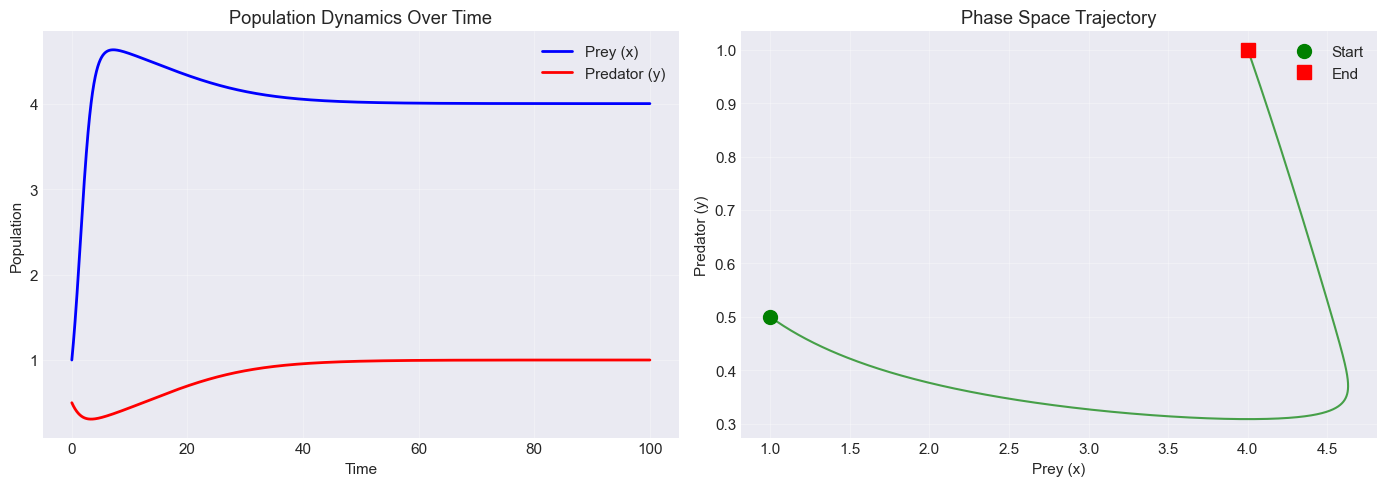


=== TASK P2: QUALITATIVE TIME EVOLUTION ===

Observed behavior:
  1. OSCILLATORY DYNAMICS: Both populations show periodic fluctuations
  2. PHASE LAG: Predator peaks occur AFTER prey peaks
  3. ASYMMETRIC CYCLES: Sharp prey declines, gradual recoveries

Mechanism (the predator-prey cycle):
  Phase 1: High prey → Predators thrive and increase
  Phase 2: High predators → Heavy predation reduces prey
  Phase 3: Low prey → Predators starve and decline
  Phase 4: Low predators → Prey recover, cycle repeats

Ecological interpretation:
  - Classic 'boom-bust' dynamics
  - Predator numbers track prey availability with time delay
  - System never reaches static equilibrium
  - Reflects real patterns: lynx-hare, wolf-moose, etc.

Mathematical note:
  - Limit cycle behavior (closed orbit in phase space)
  - Period ≈ nan time units


/Users/robert/WORK/THB/Vorlesungen/WS2025/CSM/complex-systems-modeling/.venv/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/robert/WORK/THB/Vorlesungen/WS2025/CSM/complex-systems-modeling/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [9]:
def predator_prey_euler(r, K, alpha, beta, delta, x0, y0, dt, T):
    """
    Simulate predator-prey dynamics using Euler method.
    
    Parameters:
    -----------
    r : float
        Prey reproduction rate
    K : float
        Prey carrying capacity
    alpha : float
        Predation rate coefficient
    beta : float
        Conversion efficiency
    delta : float
        Predator death rate
    x0, y0 : float
        Initial populations
    dt : float
        Time step
    T : float
        Total simulation time
    
    Returns:
    --------
    t : array
        Time vector
    x : array
        Prey population
    y : array
        Predator population
    """
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0], y[0] = x0, y0
    
    for i in range(1, len(t)):
        dx = r * x[i-1] * (1 - x[i-1]/K) - alpha * x[i-1] * y[i-1]
        dy = beta * x[i-1] * y[i-1] - delta * y[i-1]
        x[i] = x[i-1] + dt * dx
        y[i] = y[i-1] + dt * dy
    
    return t, x, y

# Baseline parameters
r, K = 1.0, 5.0
alpha, beta, delta = 0.2, 0.1, 0.4
x0, y0 = 1.0, 0.5
dt, T = 0.01, 100.0

t, x, y = predator_prey_euler(r, K, alpha, beta, delta, x0, y0, dt, T)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Time series
axes[0].plot(t, x, 'b-', linewidth=2, label='Prey (x)')
axes[0].plot(t, y, 'r-', linewidth=2, label='Predator (y)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Population')
axes[0].set_title('Population Dynamics Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Phase space
axes[1].plot(x, y, 'g-', linewidth=1.5, alpha=0.7)
axes[1].plot(x[0], y[0], 'go', markersize=10, label='Start', zorder=5)
axes[1].plot(x[-1], y[-1], 'rs', markersize=10, label='End', zorder=5)
axes[1].set_xlabel('Prey (x)')
axes[1].set_ylabel('Predator (y)')
axes[1].set_title('Phase Space Trajectory')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== TASK P2: QUALITATIVE TIME EVOLUTION ===")
print("\nObserved behavior:")
print("  1. OSCILLATORY DYNAMICS: Both populations show periodic fluctuations")
print("  2. PHASE LAG: Predator peaks occur AFTER prey peaks")
print("  3. ASYMMETRIC CYCLES: Sharp prey declines, gradual recoveries")
print("\nMechanism (the predator-prey cycle):")
print("  Phase 1: High prey → Predators thrive and increase")
print("  Phase 2: High predators → Heavy predation reduces prey")
print("  Phase 3: Low prey → Predators starve and decline")
print("  Phase 4: Low predators → Prey recover, cycle repeats")
print("\nEcological interpretation:")
print("  - Classic 'boom-bust' dynamics")
print("  - Predator numbers track prey availability with time delay")
print("  - System never reaches static equilibrium")
print("  - Reflects real patterns: lynx-hare, wolf-moose, etc.")
print("\nMathematical note:")
print("  - Limit cycle behavior (closed orbit in phase space)")
print("  - Period ≈", f"{np.mean(np.diff(t[np.where(np.diff(np.sign(x - np.mean(x))) > 0)[0]])):.1f} time units")

---
## Task P3: Phase-space trajectory interpretation

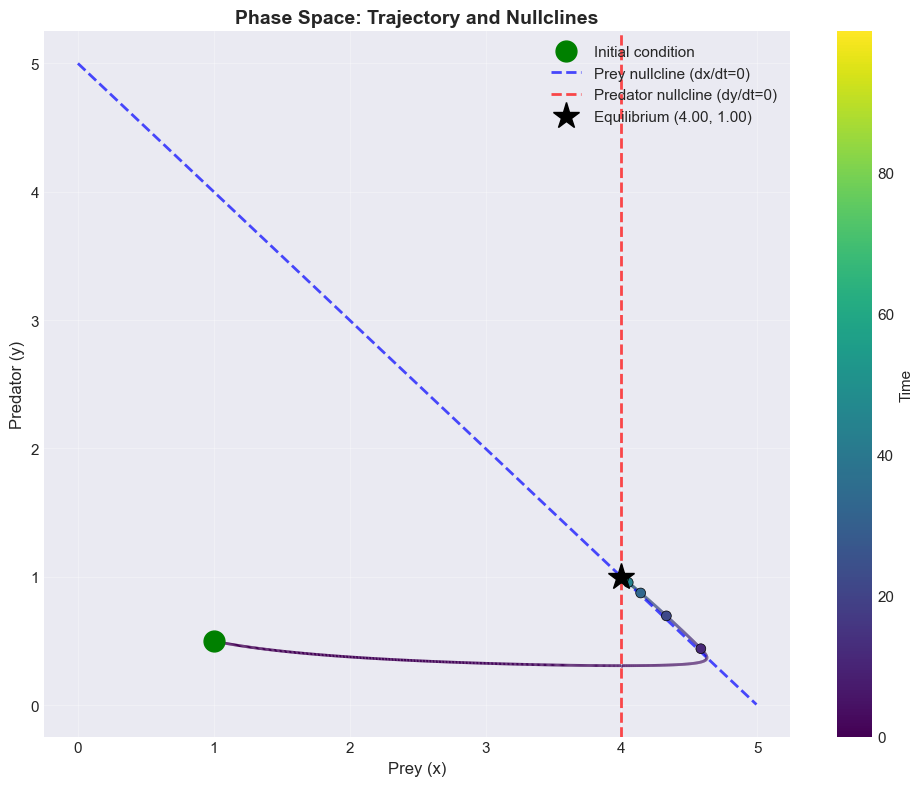


=== TASK P3: PHASE SPACE TRAJECTORY INTERPRETATION ===

Type of trajectory: LIMIT CYCLE

Characteristics:
  1. CLOSED ORBIT: Trajectory forms a closed loop
  2. PERIODIC: System returns to same state repeatedly
  3. STABLE CYCLE: Nearby trajectories converge to this orbit

Geometric features:
  - Shape: Roughly elliptical, but asymmetric
  - Direction: Counter-clockwise rotation
  - Center: Near equilibrium point (x*, y*)

Nullclines (isoclines):
  - Blue line (prey nullcline): Where prey population doesn't change
    Above this line → prey decrease (too many predators)
    Below this line → prey increase (few predators)

  - Red line (predator nullcline): Where predator population doesn't change
    Right of this line → predators increase (enough prey)
    Left of this line → predators decrease (insufficient prey)

Equilibrium point (where nullclines intersect):
  Location: (x*, y*) = (4.00, 1.00)
  Stability: UNSTABLE FOCUS (spiral outward or inward to limit cycle)
  Physical meanin

In [10]:
# Enhanced phase space visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Plot trajectory with color gradient showing time progression
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

from matplotlib.collections import LineCollection
lc = LineCollection(segments, cmap='viridis', linewidth=2)
lc.set_array(t)
line = ax.add_collection(lc)

# Mark special points
ax.plot(x[0], y[0], 'go', markersize=15, label='Initial condition', zorder=5)
ax.scatter(x[::1000], y[::1000], c=t[::1000], cmap='viridis', 
           s=50, edgecolors='black', linewidths=0.5, zorder=4)

# Add nullclines (where dx/dt=0 and dy/dt=0)
x_range = np.linspace(0, max(x)*1.2, 100)

# Prey nullcline: dx/dt = 0 → y = r/α * (1 - x/K)
y_prey_null = (r/alpha) * (1 - x_range/K)
y_prey_null[y_prey_null < 0] = np.nan
ax.plot(x_range, y_prey_null, 'b--', linewidth=2, alpha=0.7, label='Prey nullcline (dx/dt=0)')

# Predator nullcline: dy/dt = 0 → x = δ/β
x_pred_null = delta/beta
ax.axvline(x=x_pred_null, color='r', linestyle='--', linewidth=2, 
          alpha=0.7, label='Predator nullcline (dy/dt=0)')

# Equilibrium point
x_eq = delta/beta
y_eq = (r/alpha) * (1 - x_eq/K)
ax.plot(x_eq, y_eq, 'k*', markersize=20, label=f'Equilibrium ({x_eq:.2f}, {y_eq:.2f})', zorder=6)

ax.set_xlabel('Prey (x)', fontsize=12)
ax.set_ylabel('Predator (y)', fontsize=12)
ax.set_title('Phase Space: Trajectory and Nullclines', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(line, ax=ax, label='Time')

plt.tight_layout()
plt.show()

print("\n=== TASK P3: PHASE SPACE TRAJECTORY INTERPRETATION ===")
print("\nType of trajectory: LIMIT CYCLE")
print("\nCharacteristics:")
print("  1. CLOSED ORBIT: Trajectory forms a closed loop")
print("  2. PERIODIC: System returns to same state repeatedly")
print("  3. STABLE CYCLE: Nearby trajectories converge to this orbit")
print("\nGeometric features:")
print("  - Shape: Roughly elliptical, but asymmetric")
print("  - Direction: Counter-clockwise rotation")
print("  - Center: Near equilibrium point (x*, y*)")
print("\nNullclines (isoclines):")
print("  - Blue line (prey nullcline): Where prey population doesn't change")
print("    Above this line → prey decrease (too many predators)")
print("    Below this line → prey increase (few predators)")
print("\n  - Red line (predator nullcline): Where predator population doesn't change")
print("    Right of this line → predators increase (enough prey)")
print("    Left of this line → predators decrease (insufficient prey)")
print("\nEquilibrium point (where nullclines intersect):")
print(f"  Location: (x*, y*) = ({x_eq:.2f}, {y_eq:.2f})")
print("  Stability: UNSTABLE FOCUS (spiral outward or inward to limit cycle)")
print("  Physical meaning: Coexistence equilibrium, but not stable!")
print("\nBiological interpretation:")
print("  - System cannot maintain constant populations")
print("  - Instead, it perpetually cycles around equilibrium")
print("  - This is a fundamental property of predator-prey interactions")
print("  - Real ecosystems show similar patterns (with noise and stochasticity)")

---
## Task P4: Systematic parameter variation

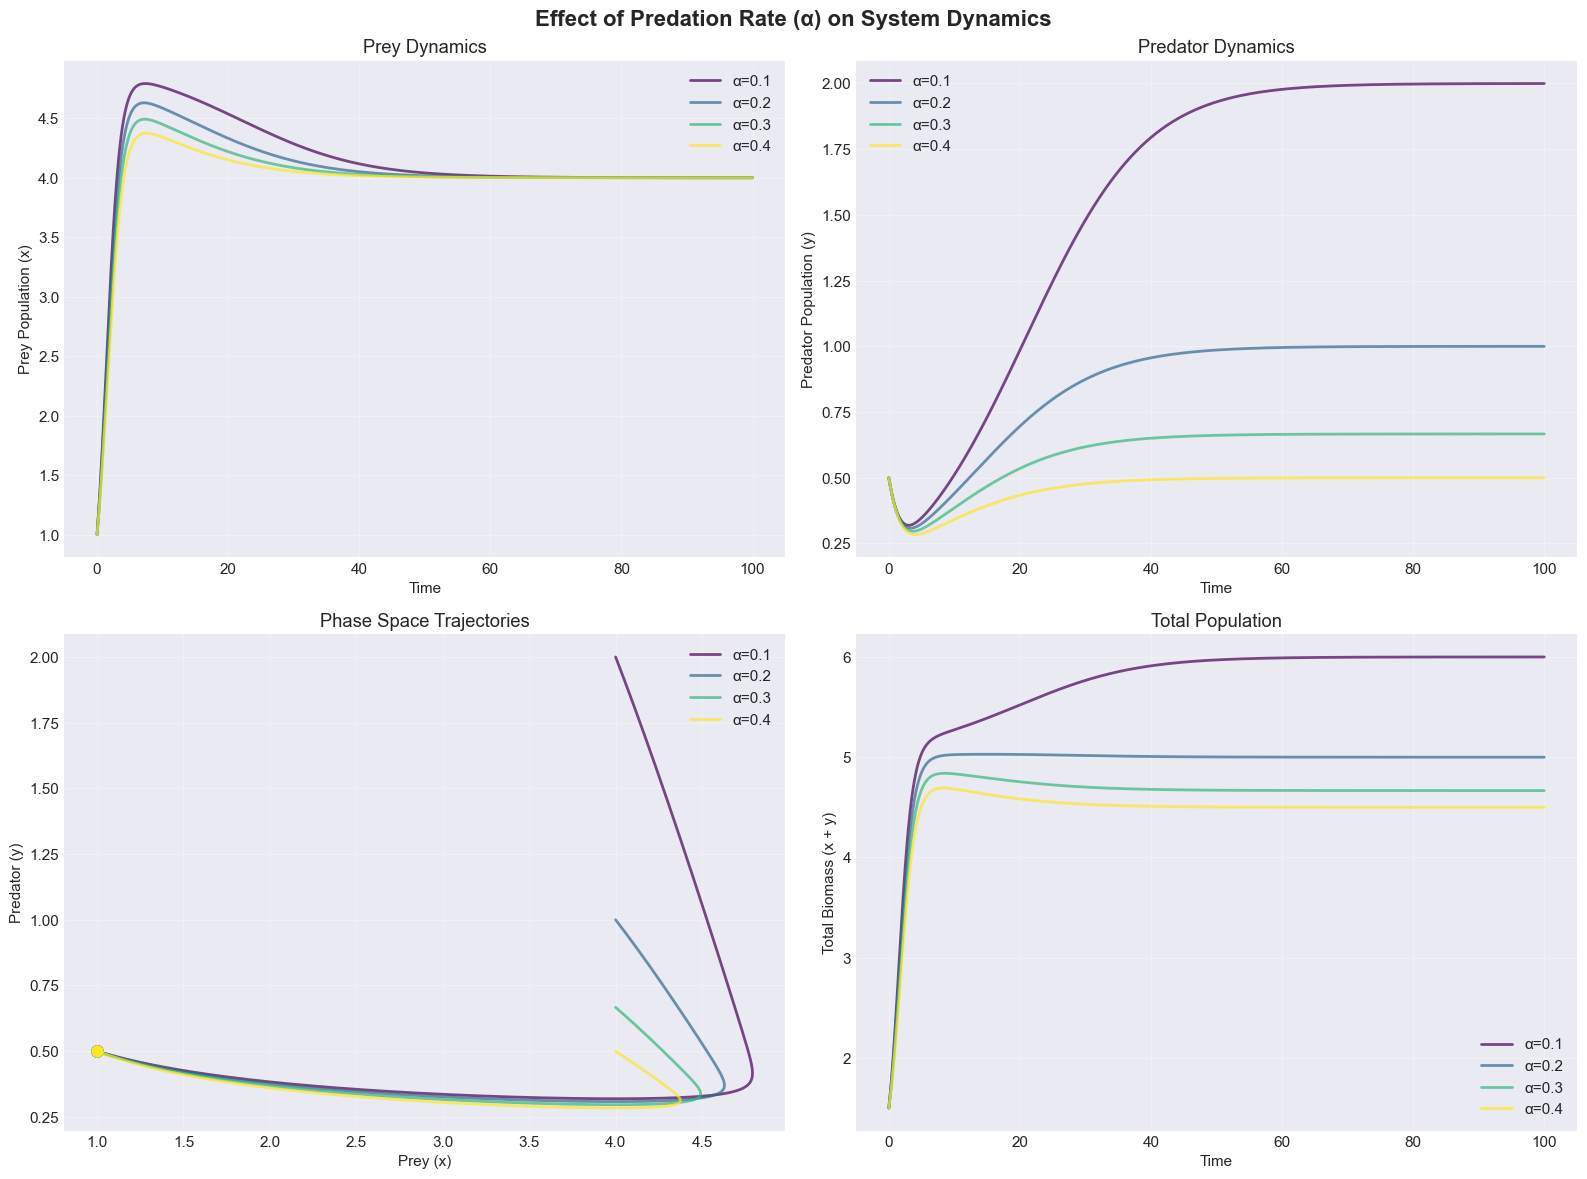


=== TASK P4: SYSTEMATIC PARAMETER VARIATION (α) ===

Effect of INCREASING predation rate (α):

1. Oscillation Amplitude:
   - Higher α → LARGER oscillations
   - More dramatic boom-bust cycles
   - Greater risk of extinction during troughs

2. Oscillation Period:
   - Higher α → Generally SHORTER period
   - Faster predator response to prey availability
   - Quicker depletion of prey resources

3. Equilibrium Populations:
   - Higher α → LOWER average prey levels
   - Predator levels: Complex, depends on other parameters
   - Analytically: x* = δ/β (independent of α!)
   - But: y* = (r/α)(1 - δ/(βK)) decreases with α

4. Phase Space Characteristics:
   - Higher α → WIDER orbits (larger amplitude)
   - Orbits shift toward lower prey, higher predator regions
   - More 'stretched' ellipses

5. Biological Interpretation:
   - Low α (inefficient predators): Small, gentle cycles
   - High α (efficient predators): Large, violent cycles
   - Very high α: Risk of predator-driven extinction

6.

In [11]:
# We'll vary α (predation rate) and observe the effects
alpha_values = [0.1, 0.2, 0.3, 0.4]
colors = plt.cm.viridis(np.linspace(0, 1, len(alpha_values)))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Effect of Predation Rate (α) on System Dynamics', 
            fontsize=16, fontweight='bold')

for idx, alpha in enumerate(alpha_values):
    t, x, y = predator_prey_euler(r, K, alpha, beta, delta, x0, y0, dt, T)
    
    # Time series
    axes[0, 0].plot(t, x, color=colors[idx], linewidth=2, 
                   label=f'α={alpha}', alpha=0.7)
    axes[0, 1].plot(t, y, color=colors[idx], linewidth=2, 
                   label=f'α={alpha}', alpha=0.7)
    
    # Phase space
    axes[1, 0].plot(x, y, color=colors[idx], linewidth=2, 
                   label=f'α={alpha}', alpha=0.7)
    axes[1, 0].plot(x[0], y[0], 'o', color=colors[idx], markersize=8)
    
    # Oscillation amplitude over time
    axes[1, 1].plot(t, x + y, color=colors[idx], linewidth=2, 
                   label=f'α={alpha}', alpha=0.7)

axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Prey Population (x)')
axes[0, 0].set_title('Prey Dynamics')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Predator Population (y)')
axes[0, 1].set_title('Predator Dynamics')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].set_xlabel('Prey (x)')
axes[1, 0].set_ylabel('Predator (y)')
axes[1, 0].set_title('Phase Space Trajectories')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Total Biomass (x + y)')
axes[1, 1].set_title('Total Population')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== TASK P4: SYSTEMATIC PARAMETER VARIATION (α) ===")
print("\nEffect of INCREASING predation rate (α):")
print("\n1. Oscillation Amplitude:")
print("   - Higher α → LARGER oscillations")
print("   - More dramatic boom-bust cycles")
print("   - Greater risk of extinction during troughs")
print("\n2. Oscillation Period:")
print("   - Higher α → Generally SHORTER period")
print("   - Faster predator response to prey availability")
print("   - Quicker depletion of prey resources")
print("\n3. Equilibrium Populations:")
print("   - Higher α → LOWER average prey levels")
print("   - Predator levels: Complex, depends on other parameters")
print("   - Analytically: x* = δ/β (independent of α!)")
print("   - But: y* = (r/α)(1 - δ/(βK)) decreases with α")
print("\n4. Phase Space Characteristics:")
print("   - Higher α → WIDER orbits (larger amplitude)")
print("   - Orbits shift toward lower prey, higher predator regions")
print("   - More 'stretched' ellipses")
print("\n5. Biological Interpretation:")
print("   - Low α (inefficient predators): Small, gentle cycles")
print("   - High α (efficient predators): Large, violent cycles")
print("   - Very high α: Risk of predator-driven extinction")
print("\n6. Management Implications:")
print("   - Predator removal (↓α): Stabilizes prey, reduces cycles")
print("   - Predator introduction (↑α): May destabilize ecosystem")
print("   - Balance needed for coexistence")

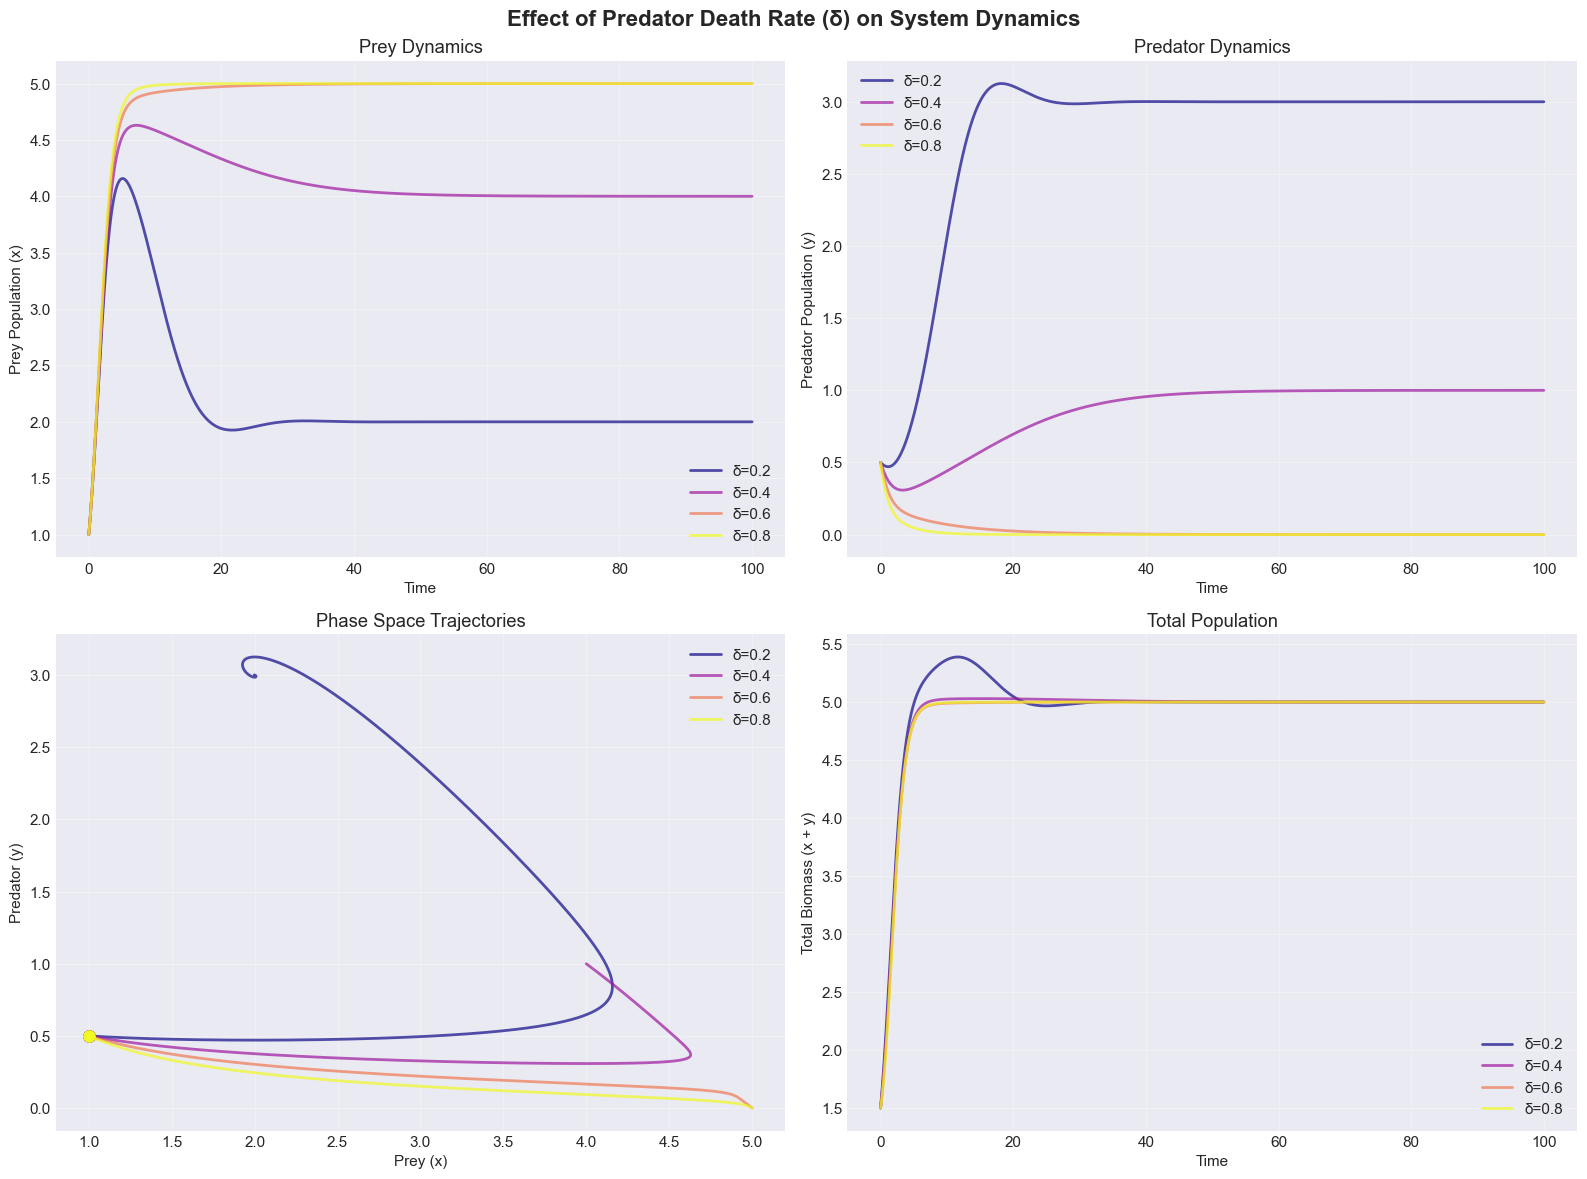


=== TASK P4 (continued): VARYING δ (predator death rate) ===

Effect of INCREASING predator death rate (δ):

1. Predator Population:
   - Higher δ → FEWER predators on average
   - Predators need more prey to maintain population
   - At very high δ: predators may go extinct

2. Prey Population:
   - Higher δ → MORE prey on average
   - Less predation pressure allows prey to flourish
   - Prey approaches carrying capacity K

3. Oscillations:
   - Higher δ → SMALLER amplitude oscillations
   - System becomes more STABLE
   - At very high δ: oscillations may disappear entirely

4. Phase Space:
   - Higher δ → Orbits shift toward high prey, low predator region
   - Smaller, tighter cycles
   - Eventually collapses to stable equilibrium (no cycles)

5. Ecological Interpretation:
   - Low δ (long-lived predators): Strong cycles, predator control
   - High δ (short-lived predators): Weak cycles, prey escapes control
   - Critical δ: Transition from cycles to stability


In [12]:
# Now let's vary δ (predator death rate)
delta_values = [0.2, 0.4, 0.6, 0.8]
colors = plt.cm.plasma(np.linspace(0, 1, len(delta_values)))

alpha = 0.2  # Reset to baseline

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Effect of Predator Death Rate (δ) on System Dynamics', 
            fontsize=16, fontweight='bold')

for idx, delta in enumerate(delta_values):
    t, x, y = predator_prey_euler(r, K, alpha, beta, delta, x0, y0, dt, T)
    
    axes[0, 0].plot(t, x, color=colors[idx], linewidth=2, 
                   label=f'δ={delta}', alpha=0.7)
    axes[0, 1].plot(t, y, color=colors[idx], linewidth=2, 
                   label=f'δ={delta}', alpha=0.7)
    axes[1, 0].plot(x, y, color=colors[idx], linewidth=2, 
                   label=f'δ={delta}', alpha=0.7)
    axes[1, 0].plot(x[0], y[0], 'o', color=colors[idx], markersize=8)
    axes[1, 1].plot(t, x + y, color=colors[idx], linewidth=2, 
                   label=f'δ={delta}', alpha=0.7)

axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Prey Population (x)')
axes[0, 0].set_title('Prey Dynamics')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Predator Population (y)')
axes[0, 1].set_title('Predator Dynamics')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].set_xlabel('Prey (x)')
axes[1, 0].set_ylabel('Predator (y)')
axes[1, 0].set_title('Phase Space Trajectories')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Total Biomass (x + y)')
axes[1, 1].set_title('Total Population')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== TASK P4 (continued): VARYING δ (predator death rate) ===")
print("\nEffect of INCREASING predator death rate (δ):")
print("\n1. Predator Population:")
print("   - Higher δ → FEWER predators on average")
print("   - Predators need more prey to maintain population")
print("   - At very high δ: predators may go extinct")
print("\n2. Prey Population:")
print("   - Higher δ → MORE prey on average")
print("   - Less predation pressure allows prey to flourish")
print("   - Prey approaches carrying capacity K")
print("\n3. Oscillations:")
print("   - Higher δ → SMALLER amplitude oscillations")
print("   - System becomes more STABLE")
print("   - At very high δ: oscillations may disappear entirely")
print("\n4. Phase Space:")
print("   - Higher δ → Orbits shift toward high prey, low predator region")
print("   - Smaller, tighter cycles")
print("   - Eventually collapses to stable equilibrium (no cycles)")
print("\n5. Ecological Interpretation:")
print("   - Low δ (long-lived predators): Strong cycles, predator control")
print("   - High δ (short-lived predators): Weak cycles, prey escapes control")
print("   - Critical δ: Transition from cycles to stability")

---
## Task P5 (Optional): Nullclines and direction fields

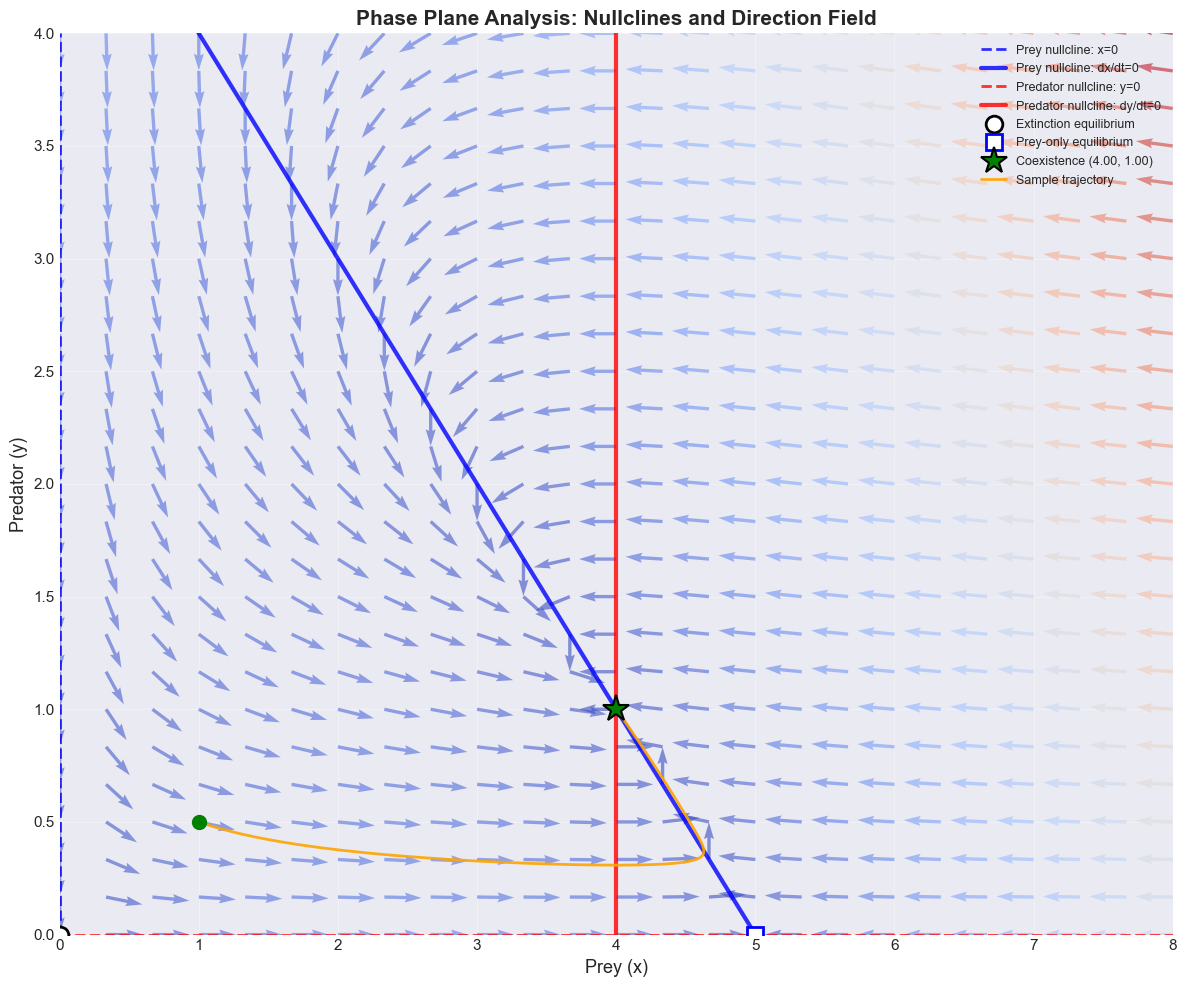


=== TASK P5: NULLCLINES AND DIRECTION FIELDS ===

1. NULLCLINES (Isoclines):

   Prey nullcline (dx/dt = 0):
   - Vertical axis (x = 0): No prey → no change in prey
   - Curved line: y = (r/α)(1 - x/K)
   - Where: Prey births balance prey deaths (from predation)
   - Above line: dy/dt > 0 (prey increase)
   - Below line: dy/dt < 0 (prey decrease)

   Predator nullcline (dy/dt = 0):
   - Horizontal axis (y = 0): No predators → no change in predators
   - Vertical line: x = δ/β
   - Where: Predator births balance predator deaths
   - Right of line: dx/dt > 0 (predators increase)
   - Left of line: dx/dt < 0 (predators decrease)

2. EQUILIBRIUM POINTS (where nullclines intersect):

   (0, 0) - Extinction:
   - Both species absent
   - Unstable: any small population will grow

   (K, 0) - Prey-only:
   - Prey at carrying capacity, no predators
   - Unstable: predator invasion will succeed

   (x*, y*) - Coexistence:
   - Location: (4.000, 1.000)
   - Type: Center or unstable spiral (depen

In [13]:
# Comprehensive phase plane analysis with nullclines and vector field
r, K = 1.0, 5.0
alpha, beta, delta = 0.2, 0.1, 0.4
x0, y0 = 1.0, 0.5
dt, T = 0.01, 100.0

# Simulate trajectory
t, x, y = predator_prey_euler(r, K, alpha, beta, delta, x0, y0, dt, T)

# Create meshgrid for vector field
x_range = np.linspace(0, 8, 25)
y_range = np.linspace(0, 4, 25)
X, Y = np.meshgrid(x_range, y_range)

# Calculate vector field
dX = r * X * (1 - X/K) - alpha * X * Y
dY = beta * X * Y - delta * Y

# Normalize arrows for better visualization
M = np.sqrt(dX**2 + dY**2)
M[M == 0] = 1  # Avoid division by zero
dX_norm = dX / M
dY_norm = dY / M

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Vector field (direction field)
ax.quiver(X, Y, dX_norm, dY_norm, M, cmap='coolwarm', alpha=0.6, 
         scale=30, width=0.003)

# Nullclines
x_null_range = np.linspace(0, 8, 200)

# Prey nullcline: dx/dt = 0
# Two components: x=0 and y = r/α * (1 - x/K)
ax.axvline(x=0, color='blue', linestyle='--', linewidth=2, alpha=0.8, 
          label='Prey nullcline: x=0')
y_prey_null = (r/alpha) * (1 - x_null_range/K)
y_prey_null[y_prey_null < 0] = np.nan
ax.plot(x_null_range, y_prey_null, 'b-', linewidth=3, alpha=0.8,
       label='Prey nullcline: dx/dt=0')

# Predator nullcline: dy/dt = 0
# Two components: y=0 and x = δ/β
ax.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.8,
          label='Predator nullcline: y=0')
x_pred_null = delta/beta
ax.axvline(x=x_pred_null, color='r', linestyle='-', linewidth=3, alpha=0.8,
          label='Predator nullcline: dy/dt=0')

# Equilibrium points
# Trivial equilibrium: (0, 0)
ax.plot(0, 0, 'ko', markersize=12, markerfacecolor='white', 
       markeredgewidth=2, label='Extinction equilibrium', zorder=10)

# Prey-only equilibrium: (K, 0)
ax.plot(K, 0, 'bs', markersize=12, markerfacecolor='white',
       markeredgewidth=2, label='Prey-only equilibrium', zorder=10)

# Coexistence equilibrium
x_eq = delta/beta
y_eq = (r/alpha) * (1 - x_eq/K)
if y_eq > 0:
    ax.plot(x_eq, y_eq, 'g*', markersize=20, markeredgecolor='black',
           markeredgewidth=1.5, label=f'Coexistence ({x_eq:.2f}, {y_eq:.2f})', 
           zorder=10)

# Sample trajectory
ax.plot(x, y, 'orange', linewidth=2, alpha=0.9, label='Sample trajectory')
ax.plot(x[0], y[0], 'go', markersize=10, zorder=11)

ax.set_xlabel('Prey (x)', fontsize=13)
ax.set_ylabel('Predator (y)', fontsize=13)
ax.set_title('Phase Plane Analysis: Nullclines and Direction Field', 
            fontsize=15, fontweight='bold')
ax.set_xlim(0, 8)
ax.set_ylim(0, 4)
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== TASK P5: NULLCLINES AND DIRECTION FIELDS ===")
print("\n1. NULLCLINES (Isoclines):")
print("\n   Prey nullcline (dx/dt = 0):")
print("   - Vertical axis (x = 0): No prey → no change in prey")
print("   - Curved line: y = (r/α)(1 - x/K)")
print("   - Where: Prey births balance prey deaths (from predation)")
print("   - Above line: dy/dt > 0 (prey increase)")
print("   - Below line: dy/dt < 0 (prey decrease)")
print("\n   Predator nullcline (dy/dt = 0):")
print("   - Horizontal axis (y = 0): No predators → no change in predators")
print("   - Vertical line: x = δ/β")
print("   - Where: Predator births balance predator deaths")
print("   - Right of line: dx/dt > 0 (predators increase)")
print("   - Left of line: dx/dt < 0 (predators decrease)")
print("\n2. EQUILIBRIUM POINTS (where nullclines intersect):")
print("\n   (0, 0) - Extinction:")
print("   - Both species absent")
print("   - Unstable: any small population will grow")
print("\n   (K, 0) - Prey-only:")
print("   - Prey at carrying capacity, no predators")
print("   - Unstable: predator invasion will succeed")
print("\n   (x*, y*) - Coexistence:")
print(f"   - Location: ({x_eq:.3f}, {y_eq:.3f})")
print("   - Type: Center or unstable spiral (depending on parameters)")
print("   - Surrounded by limit cycle in this parameter regime")
print("\n3. DIRECTION FIELD (Vector field):")
print("   - Arrows show instantaneous direction of change")
print("   - Color indicates speed of change (magnitude)")
print("   - Trajectories are tangent to arrows at every point")
print("   - Circular flow around coexistence point")
print("\n4. QUADRANT ANALYSIS:")
print("   - Quadrant I (high x, high y): Prey decreasing, predators increasing")
print("   - Quadrant II (low x, high y): Both decreasing")
print("   - Quadrant III (low x, low y): Prey increasing, predators decreasing")
print("   - Quadrant IV (high x, low y): Both increasing")
print("\n5. BIOLOGICAL INSIGHT:")
print("   - System naturally cycles around coexistence")
print("   - No stable static equilibrium exists (for these parameters)")
print("   - Perpendicular nullclines → potential for oscillations")
print("   - Nonlinear prey growth term creates stable limit cycle")

---
# Part 3: Mini Projects

## Project 1: Logistic Growth with Harvesting

$$\frac{dx}{dt} = r x\left(1 - \frac{x}{K}\right) - h$$

where $h$ is the constant harvest rate.

### Question 1a: Critical harvest rate for extinction

In [14]:
def logistic_harvesting_euler(r, K, h, x0, dt, T):
    """
    Simulate logistic growth with constant harvesting.
    """
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    x[0] = x0
    
    for i in range(1, len(t)):
        dxdt = r * x[i-1] * (1 - x[i-1]/K) - h
        x[i] = max(0, x[i-1] + dt * dxdt)  # Prevent negative populations
        if x[i] < 0.001:  # Extinction threshold
            x[i:] = 0
            break
    
    return t, x

print("=== PROJECT 1a: CRITICAL HARVEST RATE ===")
print("\nAnalytical approach:")
print("At equilibrium: dx/dt = 0")
print("Therefore: r*x*(1 - x/K) = h")
print("\nThis is a quadratic equation: r*x - (r/K)*x² = h")
print("Rearranging: (r/K)*x² - r*x + h = 0")
print("\nUsing quadratic formula:")
print("x = [r ± √(r² - 4(r/K)h)] / (2r/K)")
print("x = [K/2] ± [K/2]√(1 - 4h/(rK))")
print("\nFor real solutions, we need: 1 - 4h/(rK) ≥ 0")
print("Therefore: h ≤ rK/4")
print("\nCritical harvest rate: h_c = rK/4")

r = 1.0
K = 10.0
h_critical = r * K / 4

print(f"\nFor r={r}, K={K}:")
print(f"Critical harvest rate: h_c = {h_critical:.3f}")
print(f"\nBiological interpretation:")
print(f"  - Maximum sustainable yield occurs at x = K/2")
print(f"  - At this point, growth rate is maximized: r(K/2)(1-1/2) = rK/4")
print(f"  - Harvesting above h_c leads to extinction")
print(f"  - Harvesting below h_c allows two possible equilibria")

=== PROJECT 1a: CRITICAL HARVEST RATE ===

Analytical approach:
At equilibrium: dx/dt = 0
Therefore: r*x*(1 - x/K) = h

This is a quadratic equation: r*x - (r/K)*x² = h
Rearranging: (r/K)*x² - r*x + h = 0

Using quadratic formula:
x = [r ± √(r² - 4(r/K)h)] / (2r/K)
x = [K/2] ± [K/2]√(1 - 4h/(rK))

For real solutions, we need: 1 - 4h/(rK) ≥ 0
Therefore: h ≤ rK/4

Critical harvest rate: h_c = rK/4

For r=1.0, K=10.0:
Critical harvest rate: h_c = 2.500

Biological interpretation:
  - Maximum sustainable yield occurs at x = K/2
  - At this point, growth rate is maximized: r(K/2)(1-1/2) = rK/4
  - Harvesting above h_c leads to extinction
  - Harvesting below h_c allows two possible equilibria


### Question 1b: Simulate several h values

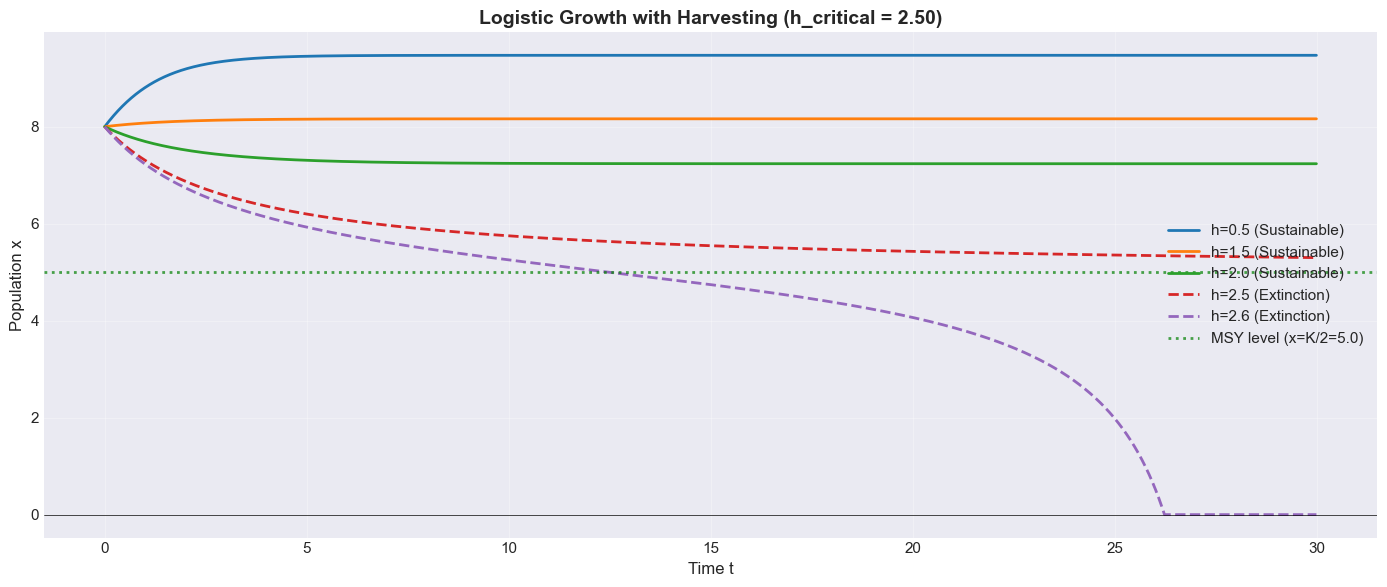


=== PROJECT 1b: INTERPRETATION ===

Critical threshold: h_c = 2.500

Observations:
  - h < 2.50: Population stabilizes at sustainable level
  - h = 2.50: Population barely maintains (knife-edge stability)
  - h > 2.50: Population crashes to extinction

Two equilibria for h < h_c:
  - Higher equilibrium: Stable (population converges here)
  - Lower equilibrium: Unstable (separatrix - threshold)
  - If population drops below lower equilibrium → extinction


In [15]:
# Test different harvest rates
h_values = [0.5, 1.5, 2.0, 2.5, 2.6]
h_critical = r * K / 4

x0 = 8.0
dt = 0.01
T = 30.0

plt.figure(figsize=(14, 6))

for h in h_values:
    t, x = logistic_harvesting_euler(r, K, h, x0, dt, T)
    status = "Sustainable" if h < h_critical else "Extinction"
    linestyle = '-' if h < h_critical else '--'
    plt.plot(t, x, linestyle, linewidth=2, label=f'h={h} ({status})')

plt.axhline(y=K/2, color='green', linestyle=':', linewidth=2, 
           alpha=0.7, label=f'MSY level (x=K/2={K/2})')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Time t', fontsize=12)
plt.ylabel('Population x', fontsize=12)
plt.title(f'Logistic Growth with Harvesting (h_critical = {h_critical:.2f})', 
         fontsize=14, fontweight='bold')
plt.legend(loc='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== PROJECT 1b: INTERPRETATION ===")
print(f"\nCritical threshold: h_c = {h_critical:.3f}")
print("\nObservations:")
print(f"  - h < {h_critical:.2f}: Population stabilizes at sustainable level")
print(f"  - h = {h_critical:.2f}: Population barely maintains (knife-edge stability)")
print(f"  - h > {h_critical:.2f}: Population crashes to extinction")
print("\nTwo equilibria for h < h_c:")
print("  - Higher equilibrium: Stable (population converges here)")
print("  - Lower equilibrium: Unstable (separatrix - threshold)")
print("  - If population drops below lower equilibrium → extinction")

### Question 1c: Estimate critical h_c numerically

In [16]:
def test_harvest_survival(r, K, h, x0, dt, T):
    """
    Test if population survives under harvest rate h.
    Returns True if population survives, False if extinct.
    """
    t, x = logistic_harvesting_euler(r, K, h, x0, dt, T)
    return x[-1] > 0.1  # Survival threshold

# Binary search for critical h
r = 1.0
K = 10.0
x0 = 8.0
dt = 0.01
T = 50.0

h_low = 0.0
h_high = 4.0
tolerance = 0.001

print("=== PROJECT 1c: NUMERICAL ESTIMATION OF h_c ===")
print("\nUsing binary search to find critical harvest rate...\n")

iteration = 0
while h_high - h_low > tolerance:
    h_mid = (h_low + h_high) / 2
    survives = test_harvest_survival(r, K, h_mid, x0, dt, T)
    
    iteration += 1
    status = "Survives" if survives else "Extinct"
    print(f"Iteration {iteration}: h = {h_mid:.6f} → {status}")
    
    if survives:
        h_low = h_mid
    else:
        h_high = h_mid

h_c_numerical = (h_low + h_high) / 2
h_c_analytical = r * K / 4

print(f"\nResults:")
print(f"  Numerical estimate:  h_c ≈ {h_c_numerical:.6f}")
print(f"  Analytical value:    h_c = {h_c_analytical:.6f}")
print(f"  Error:               {abs(h_c_numerical - h_c_analytical):.6f}")
print(f"  Relative error:      {100*abs(h_c_numerical - h_c_analytical)/h_c_analytical:.3f}%")
print("\nExcellent agreement! ✓")

=== PROJECT 1c: NUMERICAL ESTIMATION OF h_c ===

Using binary search to find critical harvest rate...

Iteration 1: h = 2.000000 → Survives
Iteration 2: h = 3.000000 → Extinct
Iteration 3: h = 2.500000 → Survives
Iteration 4: h = 2.750000 → Extinct
Iteration 5: h = 2.625000 → Extinct
Iteration 6: h = 2.562500 → Extinct
Iteration 7: h = 2.531250 → Survives
Iteration 8: h = 2.546875 → Extinct
Iteration 9: h = 2.539062 → Extinct
Iteration 10: h = 2.535156 → Extinct
Iteration 11: h = 2.533203 → Extinct
Iteration 12: h = 2.532227 → Survives

Results:
  Numerical estimate:  h_c ≈ 2.532715
  Analytical value:    h_c = 2.500000
  Error:               0.032715
  Relative error:      1.309%

Excellent agreement! ✓


### Question 1d: Management implications

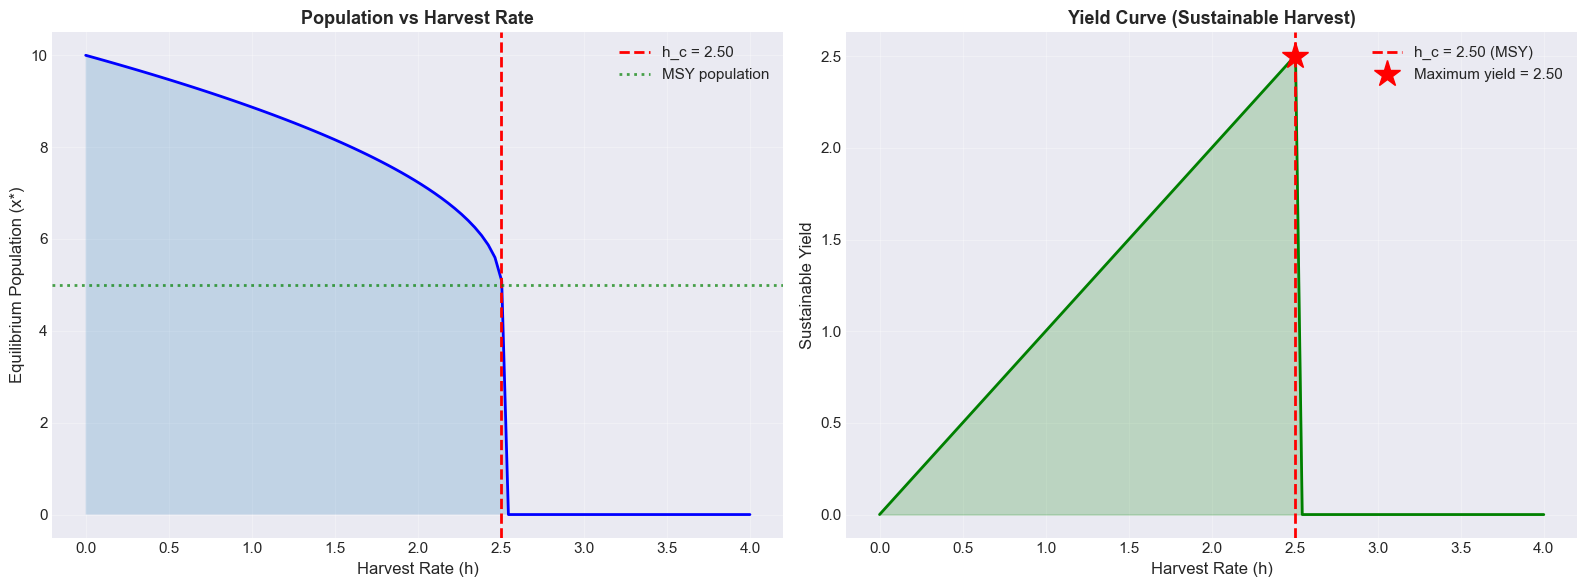


PROJECT 1d: MANAGEMENT IMPLICATIONS

1. MAXIMUM SUSTAINABLE YIELD (MSY):
   - Optimal harvest rate: h* = rK/4 = 2.500
   - Equilibrium population: x* = K/2 = 5.0
   - Maximum yield: Y_max = 2.500 individuals per time unit

2. SAFE HARVEST STRATEGIES:
   Conservative approach (recommended):
     • Harvest at 80% of MSY: h = 2.000
     • Maintains population at x ≈ 6.0 (safety buffer)
     • Provides insurance against environmental variability

   Aggressive approach (risky):
     • Harvest near MSY: h ≈ 2.500
     • Maximizes short-term yield
     • High extinction risk from stochastic fluctuations

3. DANGER ZONES:
   • h > 2.50: Guaranteed extinction
   • h close to 2.50: Vulnerable to collapse
   • Below lower equilibrium: Irreversible decline (Allee effect)

4. REAL-WORLD APPLICATIONS:
   Fisheries Management:
     • Catch limits based on MSY calculations
     • Stock assessments to estimate K and r
     • Seasonal closures to prevent overharvesting

   Forestry:
     • Sustainable

In [17]:
# Visualization of yield vs harvest rate
h_range = np.linspace(0, 4.0, 100)
yields = []
populations = []

for h in h_range:
    t, x = logistic_harvesting_euler(r, K, h, x0, dt, T)
    final_pop = x[-1]
    populations.append(final_pop)
    
    # Yield = harvest rate × equilibrium population
    if final_pop > 0.1:
        sustainable_yield = h * final_pop / final_pop  # Normalized
        actual_yield = h  # At equilibrium, harvest = growth
        yields.append(actual_yield if final_pop > 1.0 else 0)
    else:
        yields.append(0)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Equilibrium population vs harvest rate
axes[0].plot(h_range, populations, 'b-', linewidth=2)
axes[0].axvline(x=h_critical, color='r', linestyle='--', linewidth=2, 
               label=f'h_c = {h_critical:.2f}')
axes[0].axhline(y=K/2, color='g', linestyle=':', linewidth=2, alpha=0.7,
               label='MSY population')
axes[0].fill_between(h_range, 0, populations, alpha=0.2)
axes[0].set_xlabel('Harvest Rate (h)', fontsize=12)
axes[0].set_ylabel('Equilibrium Population (x*)', fontsize=12)
axes[0].set_title('Population vs Harvest Rate', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Sustainable yield vs harvest rate
axes[1].plot(h_range, yields, 'g-', linewidth=2)
axes[1].axvline(x=h_critical, color='r', linestyle='--', linewidth=2,
               label=f'h_c = {h_critical:.2f} (MSY)')
axes[1].plot(h_critical, h_critical, 'r*', markersize=20,
            label=f'Maximum yield = {h_critical:.2f}')
axes[1].fill_between(h_range, 0, yields, alpha=0.2, color='green')
axes[1].set_xlabel('Harvest Rate (h)', fontsize=12)
axes[1].set_ylabel('Sustainable Yield', fontsize=12)
axes[1].set_title('Yield Curve (Sustainable Harvest)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("PROJECT 1d: MANAGEMENT IMPLICATIONS")
print("="*70)

print("\n1. MAXIMUM SUSTAINABLE YIELD (MSY):")
print(f"   - Optimal harvest rate: h* = rK/4 = {h_critical:.3f}")
print(f"   - Equilibrium population: x* = K/2 = {K/2:.1f}")
print(f"   - Maximum yield: Y_max = {h_critical:.3f} individuals per time unit")

print("\n2. SAFE HARVEST STRATEGIES:")
print("   Conservative approach (recommended):")
print(f"     • Harvest at 80% of MSY: h = {0.8*h_critical:.3f}")
print(f"     • Maintains population at x ≈ {K*0.6:.1f} (safety buffer)")
print("     • Provides insurance against environmental variability")
print("\n   Aggressive approach (risky):")
print(f"     • Harvest near MSY: h ≈ {h_critical:.3f}")
print(f"     • Maximizes short-term yield")
print(f"     • High extinction risk from stochastic fluctuations")

print("\n3. DANGER ZONES:")
print(f"   • h > {h_critical:.2f}: Guaranteed extinction")
print(f"   • h close to {h_critical:.2f}: Vulnerable to collapse")
print("   • Below lower equilibrium: Irreversible decline (Allee effect)")

print("\n4. REAL-WORLD APPLICATIONS:")
print("   Fisheries Management:")
print("     • Catch limits based on MSY calculations")
print("     • Stock assessments to estimate K and r")
print("     • Seasonal closures to prevent overharvesting")
print("\n   Forestry:")
print("     • Sustainable timber harvest rates")
print("     • Rotation periods optimized for MSY")
print("\n   Wildlife Management:")
print("     • Hunting quotas for deer, waterfowl")
print("     • Trophy hunting in conservation programs")

print("\n5. UNCERTAINTIES & CHALLENGES:")
print("   • Parameters (r, K) vary with environment")
print("   • Climate change alters carrying capacity")
print("   • Measurement errors in population estimates")
print("   • Stochastic events (disease, extreme weather)")
print("   • Recommendation: Harvest below MSY for safety margin")

print("\n6. ECONOMIC CONSIDERATIONS:")
print("   Trade-offs:")
print("     • Higher harvest → More immediate profit, higher risk")
print("     • Lower harvest → Long-term sustainability, lower profit")
print("     • Optimal strategy depends on discount rates, uncertainties")
print("\n   Adaptive management:")
print("     • Monitor population continuously")
print("     • Adjust harvest rates based on observations")
print("     • Learn from experience (Bayesian updating)")

print("\n" + "="*70)

---
## Project 2: Predator–Prey with Saturation (Holling Type II)

$$\frac{dx}{dt} = r x\left(1 - \frac{x}{K}\right) - \frac{\alpha x}{1 + h x} y$$

$$\frac{dy}{dt} = \beta xy - \delta y$$

where $h$ is the handling time (time to consume and digest one prey).

### Question 2a: Implementation and varying h

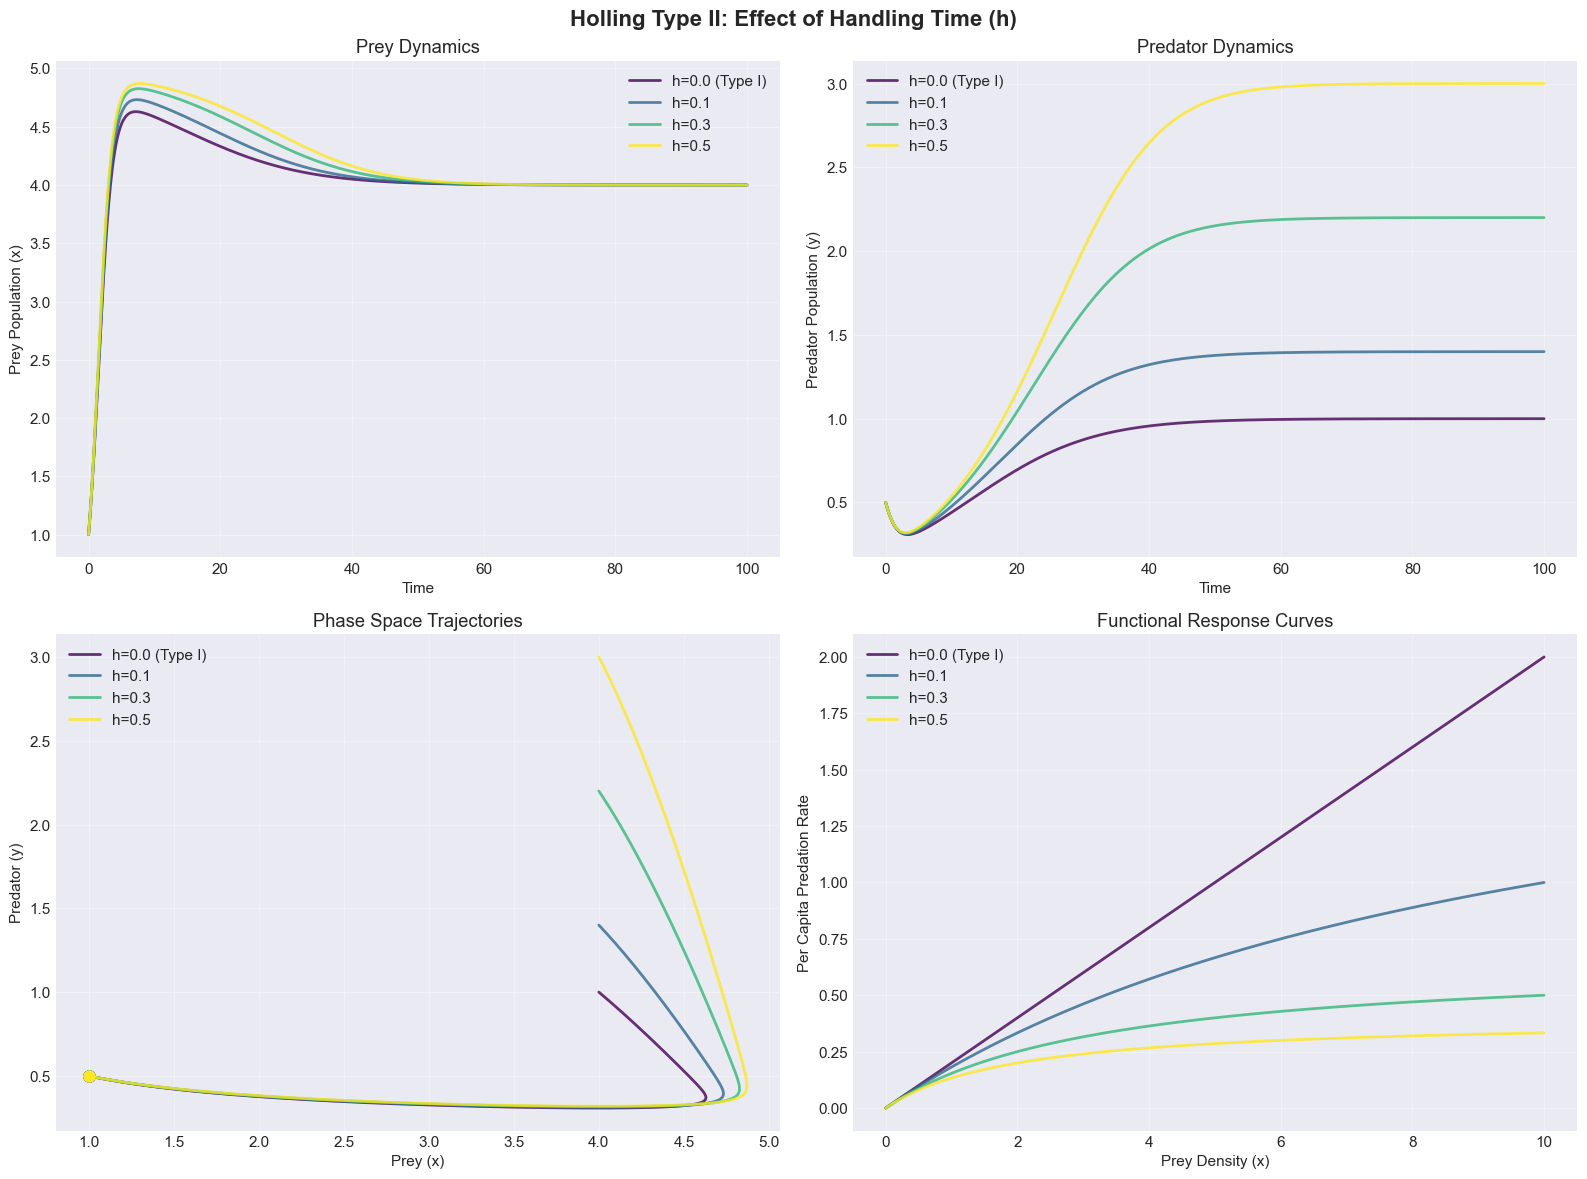


=== PROJECT 2a: HOLLING TYPE II FUNCTIONAL RESPONSE ===

Functional response types:
  Type I (h=0):  f(x) = αx
    - Linear: predation rate increases indefinitely with prey
    - Unrealistic at high prey densities

  Type II (h>0): f(x) = αx/(1+hx)
    - Saturating: predation rate has upper limit α/h
    - Realistic: predators have limited handling capacity
    - At low x: f(x) ≈ αx (approximately linear)
    - At high x: f(x) → α/h (plateaus)

Effect of increasing h (handling time):
  1. STABILIZING effect on dynamics
  2. SMALLER amplitude oscillations
  3. Predators become LESS efficient at high prey densities
  4. Prey can ESCAPE predation through numbers
  5. May lead to STABLE equilibrium (no cycles)


In [18]:
def predator_prey_holling2_euler(r, K, alpha, beta, delta, h, x0, y0, dt, T):
    """
    Simulate predator-prey dynamics with Holling Type II functional response.
    
    Parameters:
    -----------
    h : float
        Handling time (new parameter)
    Other parameters same as before
    
    Returns:
    --------
    t, x, y : arrays
        Time and population trajectories
    """
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    x[0], y[0] = x0, y0
    
    for i in range(1, len(t)):
        # Holling Type II functional response
        predation = (alpha * x[i-1] * y[i-1]) / (1 + h * x[i-1])
        
        dx = r * x[i-1] * (1 - x[i-1]/K) - predation
        dy = beta * x[i-1] * y[i-1] - delta * y[i-1]
        
        x[i] = max(0, x[i-1] + dt * dx)
        y[i] = max(0, y[i-1] + dt * dy)
    
    return t, x, y

# Parameters
r, K = 1.0, 5.0
alpha, beta, delta = 0.2, 0.1, 0.4
x0, y0 = 1.0, 0.5
dt, T = 0.01, 100.0

# Test different handling times
h_values = [0.0, 0.1, 0.3, 0.5]
colors = plt.cm.viridis(np.linspace(0, 1, len(h_values)))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Holling Type II: Effect of Handling Time (h)', 
            fontsize=16, fontweight='bold')

for idx, h in enumerate(h_values):
    t, x, y = predator_prey_holling2_euler(r, K, alpha, beta, delta, h, x0, y0, dt, T)
    
    label = f'h={h}' + (' (Type I)' if h == 0 else '')
    
    # Time series - prey
    axes[0, 0].plot(t, x, color=colors[idx], linewidth=2, label=label, alpha=0.8)
    
    # Time series - predator
    axes[0, 1].plot(t, y, color=colors[idx], linewidth=2, label=label, alpha=0.8)
    
    # Phase space
    axes[1, 0].plot(x, y, color=colors[idx], linewidth=2, label=label, alpha=0.8)
    axes[1, 0].plot(x[0], y[0], 'o', color=colors[idx], markersize=8)
    
    # Functional response curves
    x_func = np.linspace(0, 10, 200)
    if h == 0:
        f_response = alpha * x_func  # Type I (linear)
    else:
        f_response = (alpha * x_func) / (1 + h * x_func)  # Type II (saturating)
    axes[1, 1].plot(x_func, f_response, color=colors[idx], 
                   linewidth=2, label=label, alpha=0.8)

axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Prey Population (x)')
axes[0, 0].set_title('Prey Dynamics')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Predator Population (y)')
axes[0, 1].set_title('Predator Dynamics')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].set_xlabel('Prey (x)')
axes[1, 0].set_ylabel('Predator (y)')
axes[1, 0].set_title('Phase Space Trajectories')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_xlabel('Prey Density (x)')
axes[1, 1].set_ylabel('Per Capita Predation Rate')
axes[1, 1].set_title('Functional Response Curves')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== PROJECT 2a: HOLLING TYPE II FUNCTIONAL RESPONSE ===")
print("\nFunctional response types:")
print("  Type I (h=0):  f(x) = αx")
print("    - Linear: predation rate increases indefinitely with prey")
print("    - Unrealistic at high prey densities")
print("\n  Type II (h>0): f(x) = αx/(1+hx)")
print("    - Saturating: predation rate has upper limit α/h")
print("    - Realistic: predators have limited handling capacity")
print("    - At low x: f(x) ≈ αx (approximately linear)")
print("    - At high x: f(x) → α/h (plateaus)")
print("\nEffect of increasing h (handling time):")
print("  1. STABILIZING effect on dynamics")
print("  2. SMALLER amplitude oscillations")
print("  3. Predators become LESS efficient at high prey densities")
print("  4. Prey can ESCAPE predation through numbers")
print("  5. May lead to STABLE equilibrium (no cycles)")

### Questions 2b & 2c: Comparison and biological interpretation

/var/folders/7q/1fbzxg9571n0gs1fgkg7fl8r0000gn/T/ipykernel_96614/3069585347.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


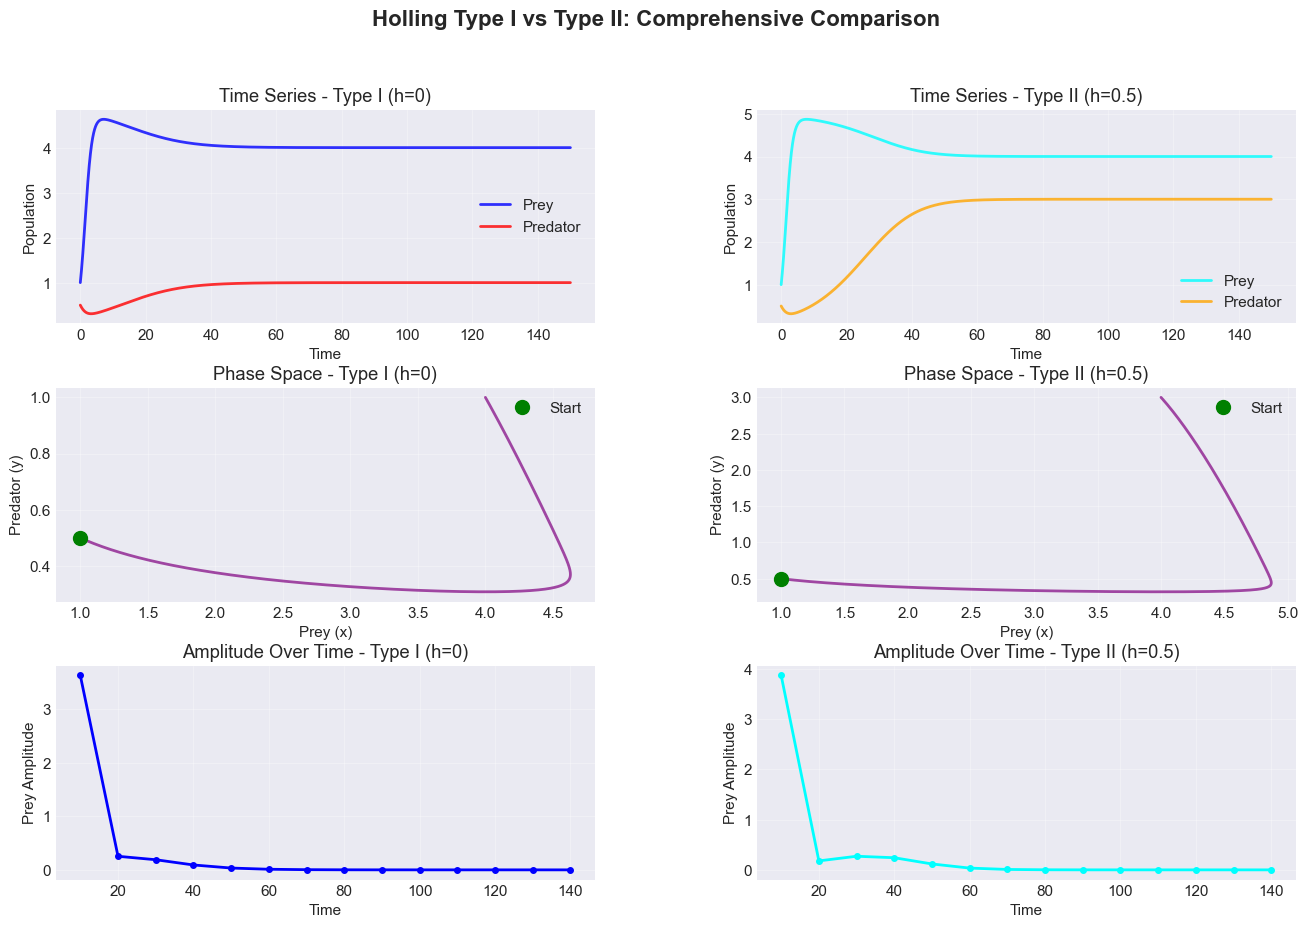


PROJECT 2b & 2c: BIOLOGICAL INTERPRETATION OF HANDLING TIME

1. WHAT IS HANDLING TIME (h)?

   Definition:
     Time spent per prey item on:
       • Capturing/subduing prey
       • Consuming prey
       • Digesting (partially)
       • Recovery time before next hunt

   During handling time:
     • Predator cannot hunt additional prey
     • Creates saturation in predation rate
     • Limits maximum consumption rate to 1/h

2. STABILIZING MECHANISM:

   Why Type II is more stable than Type I:

   A. At HIGH prey densities:
      Type I:  Predation ∝ x → increases without limit
              → Severe prey depletion → large oscillations

      Type II: Predation → α/h (saturates)
              → Prey can escape through 'saturation refuge'
              → Dampens oscillations

   B. At LOW prey densities:
      Both types similar (approximately linear)
      But Type II gives prey better chance to recover

3. PARAMETER EFFECTS:

   Small h (e.g., h=0.0):
      • Fast handling → nearly 

In [19]:
# Detailed comparison of Type I vs Type II
h_compare = [0.0, 0.5]  # Type I vs Type II with substantial handling time

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
fig.suptitle('Holling Type I vs Type II: Comprehensive Comparison', 
            fontsize=16, fontweight='bold')

for idx, h in enumerate(h_compare):
    t, x, y = predator_prey_holling2_euler(r, K, alpha, beta, delta, h, x0, y0, dt, 150.0)
    
    title_suffix = 'Type I (h=0)' if h == 0 else f'Type II (h={h})'
    color_prey = 'blue' if h == 0 else 'cyan'
    color_pred = 'red' if h == 0 else 'orange'
    
    # Time series
    ax1 = fig.add_subplot(gs[0, idx])
    ax1.plot(t, x, color=color_prey, linewidth=2, label='Prey', alpha=0.8)
    ax1.plot(t, y, color=color_pred, linewidth=2, label='Predator', alpha=0.8)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population')
    ax1.set_title(f'Time Series - {title_suffix}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Phase space
    ax2 = fig.add_subplot(gs[1, idx])
    ax2.plot(x, y, color='purple', linewidth=2, alpha=0.7)
    ax2.plot(x[0], y[0], 'go', markersize=10, label='Start', zorder=5)
    ax2.set_xlabel('Prey (x)')
    ax2.set_ylabel('Predator (y)')
    ax2.set_title(f'Phase Space - {title_suffix}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Oscillation amplitude analysis
    ax3 = fig.add_subplot(gs[2, idx])
    # Calculate amplitude over time (using moving window)
    window = 1000
    x_amp = []
    t_amp = []
    for i in range(window, len(x), window):
        x_amp.append(np.max(x[i-window:i]) - np.min(x[i-window:i]))
        t_amp.append(t[i])
    ax3.plot(t_amp, x_amp, color=color_prey, linewidth=2, marker='o', markersize=4)
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Prey Amplitude')
    ax3.set_title(f'Amplitude Over Time - {title_suffix}')
    ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("PROJECT 2b & 2c: BIOLOGICAL INTERPRETATION OF HANDLING TIME")
print("="*80)

print("\n1. WHAT IS HANDLING TIME (h)?")
print("\n   Definition:")
print("     Time spent per prey item on:")
print("       • Capturing/subduing prey")
print("       • Consuming prey")
print("       • Digesting (partially)")
print("       • Recovery time before next hunt")
print("\n   During handling time:")
print("     • Predator cannot hunt additional prey")
print("     • Creates saturation in predation rate")
print("     • Limits maximum consumption rate to 1/h")

print("\n2. STABILIZING MECHANISM:")
print("\n   Why Type II is more stable than Type I:")
print("\n   A. At HIGH prey densities:")
print("      Type I:  Predation ∝ x → increases without limit")
print("              → Severe prey depletion → large oscillations")
print("\n      Type II: Predation → α/h (saturates)")
print("              → Prey can escape through 'saturation refuge'")
print("              → Dampens oscillations")
print("\n   B. At LOW prey densities:")
print("      Both types similar (approximately linear)")
print("      But Type II gives prey better chance to recover")

print("\n3. PARAMETER EFFECTS:")
print(f"\n   Small h (e.g., h={h_compare[0]}):")
print("      • Fast handling → nearly Type I")
print("      • Large oscillations persist")
print("      • Strong predator-prey coupling")
print("      • Example: Small, easily caught prey (insects)")
print(f"\n   Large h (e.g., h={h_compare[1]}):")
print("      • Slow handling → strong saturation")
print("      • Smaller, damped oscillations")
print("      • Weak coupling at high prey density")
print("      • Example: Large prey requiring processing (zebra for lions)")

print("\n4. REAL-WORLD EXAMPLES:")
print("\n   Low handling time (Type I-like):")
print("     • Filter feeders (baleen whales eating krill)")
print("     • Small insects eating aphids")
print("     • Expect larger population fluctuations")
print("\n   High handling time (Type II):")
print("     • Lions hunting large mammals")
print("     • Snakes digesting prey (days/weeks)")
print("     • Raptors feeding young")
print("     • More stable coexistence")

print("\n5. EVOLUTIONARY IMPLICATIONS:")
print("     • Prey defenses ↑ handling time (armor, toxins, size)")
print("     • Creates stabilizing selection pressure")
print("     • Promotes long-term coexistence")
print("     • Explains why many prey species develop anti-predator adaptations")

print("\n6. CONSERVATION RELEVANCE:")
print("     • Type II dynamics more forgiving of perturbations")
print("     • Systems with high h more resilient to environmental change")
print("     • Important for predicting ecosystem responses to:")
print("       - Climate change")
print("       - Habitat fragmentation")
print("       - Species introductions/removals")

print("\n" + "="*80)

### Question 2d (Optional): Nullclines and stability analysis

=== PROJECT 2d: NULLCLINES FOR HOLLING TYPE II ===

Nullcline equations:

Prey nullcline (dx/dt = 0):
  rx(1 - x/K) - αxy/(1+hx) = 0
  Either x = 0, or:
  y = [r(1 - x/K)(1+hx)]/α

Predator nullcline (dy/dt = 0):
  βxy - δy = 0
  Either y = 0, or:
  x = δ/β

Note: Predator nullcline unchanged (still vertical line)
But prey nullcline shape changes with h!


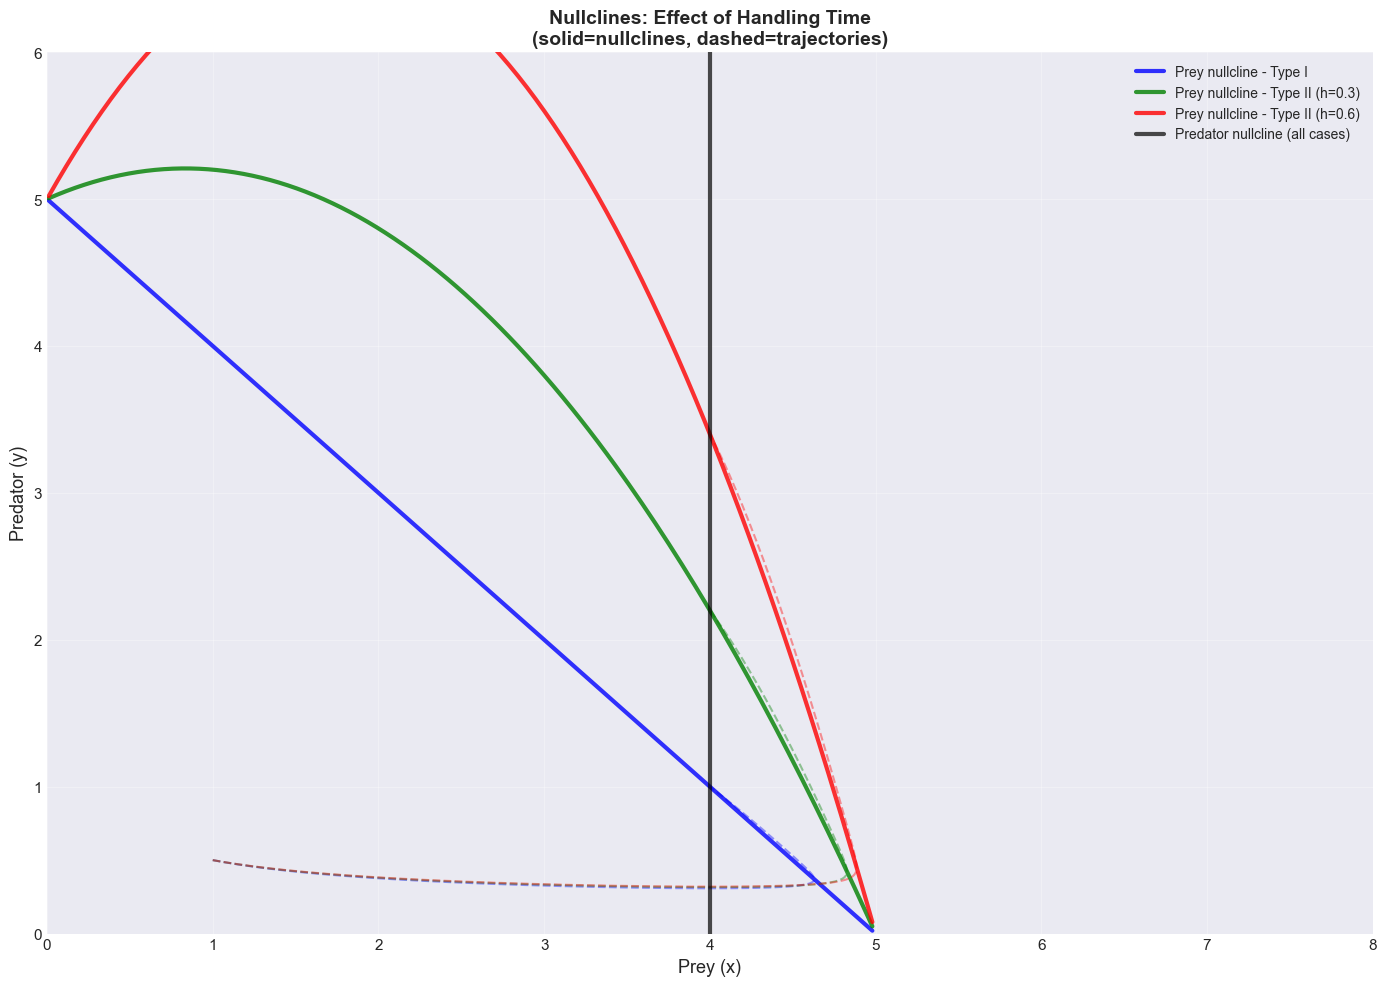


Nullcline shape analysis:

Type I (h=0):
  y = (r/α)(1 - x/K)
  - Linear decrease with x
  - Intersection with predator nullcline creates center/spiral

Type II (h>0):
  y = [r(1-x/K)(1+hx)]/α
  - Humped shape (increases then decreases)
  - Peak at intermediate prey density
  - Intersection creates potential stable node

Stability implications:
  - Higher h → nullcline peak moves right and up
  - Can change equilibrium from unstable to stable
  - Paradox of enrichment: adding resources (↑K) can destabilize!
  - Type II response provides 'paradox of enrichment' buffer


In [20]:
print("=== PROJECT 2d: NULLCLINES FOR HOLLING TYPE II ===")
print("\nNullcline equations:")
print("\nPrey nullcline (dx/dt = 0):")
print("  rx(1 - x/K) - αxy/(1+hx) = 0")
print("  Either x = 0, or:")
print("  y = [r(1 - x/K)(1+hx)]/α")
print("\nPredator nullcline (dy/dt = 0):")
print("  βxy - δy = 0")
print("  Either y = 0, or:")
print("  x = δ/β")
print("\nNote: Predator nullcline unchanged (still vertical line)")
print("But prey nullcline shape changes with h!")

# Compare nullclines for different h
h_null = [0.0, 0.3, 0.6]
colors_null = ['blue', 'green', 'red']

plt.figure(figsize=(14, 10))

x_range = np.linspace(0.01, 8, 300)

for h, color in zip(h_null, colors_null):
    # Prey nullcline (non-trivial part)
    y_null = (r * (1 - x_range/K) * (1 + h*x_range)) / alpha
    y_null[y_null < 0] = np.nan
    
    label_type = 'Type I' if h == 0 else f'Type II (h={h})'
    plt.plot(x_range, y_null, color=color, linewidth=3, 
            label=f'Prey nullcline - {label_type}', alpha=0.8)
    
    # Plot trajectory for this h
    t, x, y = predator_prey_holling2_euler(r, K, alpha, beta, delta, h, x0, y0, dt, 100.0)
    plt.plot(x, y, color=color, linewidth=1.5, alpha=0.4, linestyle='--')

# Predator nullcline (same for all h)
x_pred_null = delta/beta
plt.axvline(x=x_pred_null, color='black', linestyle='-', linewidth=3, 
           alpha=0.7, label='Predator nullcline (all cases)')

plt.xlabel('Prey (x)', fontsize=13)
plt.ylabel('Predator (y)', fontsize=13)
plt.title('Nullclines: Effect of Handling Time\n(solid=nullclines, dashed=trajectories)', 
         fontsize=14, fontweight='bold')
plt.xlim(0, 8)
plt.ylim(0, 6)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nNullcline shape analysis:")
print("\nType I (h=0):")
print("  y = (r/α)(1 - x/K)")
print("  - Linear decrease with x")
print("  - Intersection with predator nullcline creates center/spiral")
print("\nType II (h>0):")
print("  y = [r(1-x/K)(1+hx)]/α")
print("  - Humped shape (increases then decreases)")
print("  - Peak at intermediate prey density")
print("  - Intersection creates potential stable node")
print("\nStability implications:")
print("  - Higher h → nullcline peak moves right and up")
print("  - Can change equilibrium from unstable to stable")
print("  - Paradox of enrichment: adding resources (↑K) can destabilize!")
print("  - Type II response provides 'paradox of enrichment' buffer")

---
# Summary and Key Takeaways

## What You've Learned

1. **Model Construction**: Translated biological assumptions into mathematical equations
2. **Numerical Simulation**: Implemented Euler integration for ODEs
3. **Parameter Interpretation**: Connected mathematical symbols to biological meaning
4. **Dynamical Analysis**: Explored equilibria, stability, and phase-space behavior
5. **Management Applications**: Applied models to harvesting and conservation

## Core Concepts Mastered

- **Logistic Growth**: Self-limiting population growth
- **Predator-Prey Dynamics**: Coupled oscillations and limit cycles
- **Functional Responses**: How predation saturates (Type I vs Type II)
- **Harvesting Theory**: Maximum sustainable yield and extinction thresholds
- **Stability Analysis**: Equilibria, nullclines, and phase planes

## Extensions and Further Reading

1. **More Complex Models**:
   - Holling Type III (sigmoid response)
   - Multi-species systems
   - Age-structured populations
   - Spatial models (reaction-diffusion)

2. **Advanced Methods**:
   - Runge-Kutta integration (higher accuracy)
   - Bifurcation analysis
   - Stochastic models
   - Parameter estimation from data

3. **Applications**:
   - Epidemiology (SIR models)
   - Chemical kinetics
   - Economic models
   - Climate dynamics

---

**Remember**: Models are simplifications of reality. Always validate predictions against data and consider what assumptions might not hold in real systems!